## Phase 1                                                                                                                
1) Webscrape the provided URL  - IMDB dataset:

https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1

2) Store the entire data in two different CSV files as per the given fields:

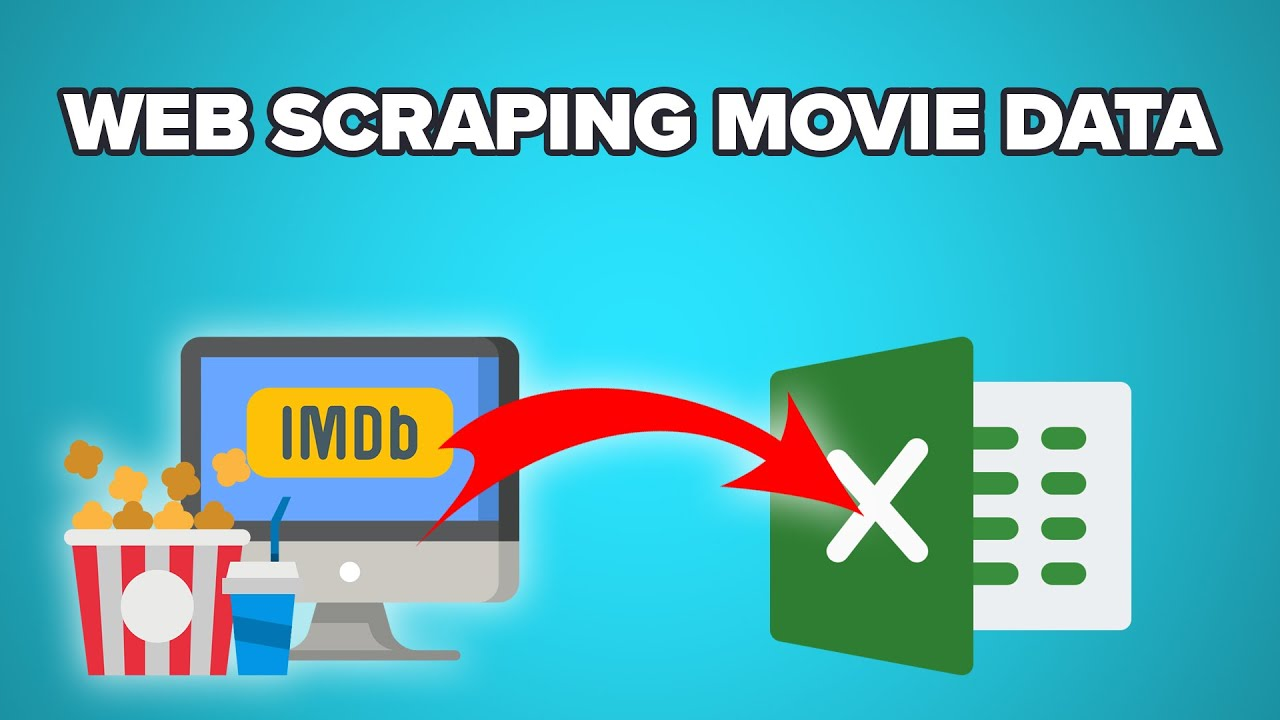

#### The first CSV file data contains :

Sno, Movie Name, Director Name, Duration, year, ratings, Metascore

Bifurcate the Director field into subfields as per the number of directors of the movie belongs to such as Director1, director2

In [1]:
!pip install selenium

In [2]:
#to know path----------testing purpose starts----
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\Atharv\\anaconda3'

In [3]:
#for testing purpose
#from time import sleep
#from selenium import webdriver
#this is tested on Chrome or you can use "webdriver.Chrome()"
#browser = webdriver.Chrome()
#browser.get('https://www.youtube.com/')
#sleep(5)
#browser.close()
#-------------------testing purpose ends----------
#print("selenium sucessfully installed........")

In [4]:
#importing libraries
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
from selenium.webdriver.common.by import By
import time
from csv import writer
from pprint import pprint
%matplotlib inline

In [5]:
#Lets first connect to the driver --- this is also one of the method do connect to the driver
#first connect to the driver
driver = webdriver.Chrome(r"C:\Users\Atharv\Downloads\chromedriver_win32.zip\chromedriver.exe")
driver.minimize_window()

In [5]:
#Create empty list for storing scraped data
import pandas as pd

Sno = []
MovieName = []
Director_stars = []
Duration = []
year = []
ratings = []
raw_Metascore = []
Votes = []
raw_Genre = []
raw_Gross_collection = []
raw_Certification = []

try:
    #opening a IMDb page on automated chrome browser
    driver.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")
    driver.maximize_window()

    # for scrolling the page 
    driver.execute_script("window.scrollTo(0,100)")
    # for scraping all Product urls
    start = 0
    end = 35
    movie_urls = []  #list to store all product url
    
    for movie in range(start,end): #for loop for scrapping all page
        url = driver.find_elements(By.XPATH,"//h3[@class='lister-item-header']//a")
        for j in url:                   
            movie_urls.append(j.get_attribute("href"))
        
        with open('IMDb_DT_evalproj_111.csv','w',encoding='utf8',newline='') as f: #File usedful in Phase -3 for Further use in EDA
            # writer will write file name 'IMDb_DT_evalproj.csv' object
            thewriter = writer(f)
            #this will be thr column name lets say header
            header_1=["Sr.no", "Movie_Name","Duration", "year", "ratings", "Metascore", "Votes", "Genre", "Gross_collection", "Certification"]
            #Sno, Movie_Name, Duration, year, ratings, Metascore,Votes,Genre,Gross_collection,Certification
            thewriter.writerow(header_1)
                 
            #Scraping sr.no.
            Sno_tags = driver.find_elements(By.XPATH,"//span[@class='lister-item-index unbold text-primary']")
            for i in Sno_tags:
                sr_num = i.text.replace(".","")
                Sno.append(sr_num)
        
            #Scraping Movie_Name from the page
            Movie_Name_tags = driver.find_elements(By.XPATH,"//div[@class='lister-item-content']//h3//a")
            for i in Movie_Name_tags:
                movie = i.text
                MovieName.append(movie)
        
            # Scraping Director_Name_Stars_name from the page
            Director_stars_tags = driver.find_elements(By.XPATH,"//p[3][@class]")
            for i in Director_stars_tags:
                dirs = i.text
                Director_stars.append(dirs)
        
            #Scraping the Duration from the page
            Durationtags = driver.find_elements(By.XPATH,"//span[@class='runtime']")
            for i in Durationtags:
                dur = i.text
                Duration.append(dur)
        
            #Scraping the year
            yeartags = driver.find_elements(By.XPATH,"//span[@class='lister-item-year text-muted unbold']")
            for i in yeartags:
                yr = i.text
                year.append(yr)
        
            #Scraping the ratings
            ratingtags = driver.find_elements(By.XPATH,"//div[@class='inline-block ratings-imdb-rating']//strong")
            for i in ratingtags:
                rating = i.text
                ratings.append(rating)
        
            #Scraping the Metascore  
            raw_Metascoretags = driver.find_elements(By.XPATH,"//div[@class='ratings-bar']")
            for i in raw_Metascoretags:
                m_score = i.text
                raw_Metascore.append(m_score)
        
            #Scraping the votes
            votestags = driver.find_elements(By.XPATH,"//p[@class='sort-num_votes-visible']//span[2]")
            for i in votestags:
                vote = i.text
                Votes.append(vote)
        
            #Scraping the genre
            genrestags = driver.find_elements(By.XPATH,"//span[@class='genre']")
            for i in genrestags:
                gnr = i.text
                raw_Genre.append(gnr)
                
            #Scraping the Gross_collection //p[@class='sort-num_votes-visible']
            raw_Gross_collectiontags = driver.find_elements(By.XPATH,"//p[@class='sort-num_votes-visible']")
            for i in raw_Gross_collectiontags:
                grscoll = i.text.replace("$","")
                raw_Gross_collection.append(grscoll)
                         
        
            #Scraping the certification
            raw_certificationtags = driver.find_elements(By.XPATH,"//p[@class='text-muted ']")
            for i in raw_certificationtags:
                certificate = i.text.split(' | ')[0:1]
                raw_Certification.append(certificate)
            
            #write the info into csv file
            Movie_infoList1=[Sno, MovieName]
            #thewriter.writerow(Movie_infoList1)
        
        nxt_button = driver.find_element(By.XPATH,"//a[@class='lister-page-next next-page']")
        nxt_button.click()
        time.sleep(1) 
        
except NoSuchElementException as e:
    print("All pages data are scraped sucessfully....")

NameError: name 'NoSuchElementException' is not defined

In [7]:
print(len(Sno),
len(MovieName),
len(Director_stars),
len(Duration),
len(year),
len(ratings),
len(raw_Metascore),
len(Votes),
len(raw_Genre),
len(raw_Gross_collection),
len(raw_Certification))

1750 1750 1750 1750 1750 1750 1750 1750 1750 1750 1750


In [8]:
#raw_Gross_collection

In [9]:
#print(Sno)                              #-------------------------------------------> Column_1(File1)- Sno
#print(Movie_Name)                       #--------------------------------------------------> Column_2(File1)- Movie_Name
Director_stars[0:5]  #Need to separete Directorslist and Starslist i use slicing technique list and clean the data

['Directors: Joaquim Dos Santos, Kemp Powers, Justin K. Thompson | Stars: Shameik Moore, Hailee Steinfeld, Oscar Isaac, Luna Lauren Velez',
 'Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 'Director: Peter Jackson | Stars: Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 'Director: Christopher Nolan | Stars: Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 'Director: Peter Jackson | Stars: Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean']

In [10]:
#List flaterning
DIR = []
STARS = []
for i in range(len(Director_stars)):
    Director_stars[i] = Director_stars[i].split(' | ')
    #print(Director_stars)
    DIR.append(Director_stars[i][:1])
    STARS.append(Director_stars[i][1:2])
    my_list1 = []
    my_list2 = []
    my_list1 = DIR
    my_list2 = STARS
    #print("The original list is:")
    #print(DIR)
    #print(STARS)
    DIR_outputList = []
    for inner_list in my_list1:
        for element in inner_list:
            DIR_outputList.append(element)
    
    STARS_outputList = []
    for inner_list in my_list2:
        for element in inner_list:
              STARS_outputList.append(element)

In [11]:
#len(DIR_outputList)
DIR_outputList[0:5]

['Directors: Joaquim Dos Santos, Kemp Powers, Justin K. Thompson',
 'Director: Christopher Nolan',
 'Director: Peter Jackson',
 'Director: Christopher Nolan',
 'Director: Peter Jackson']

In [12]:
len(DIR_outputList)

1750

In [13]:
STARS_outputList[0:5]

['Stars: Shameik Moore, Hailee Steinfeld, Oscar Isaac, Luna Lauren Velez',
 'Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 'Stars: Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 'Stars: Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 'Stars: Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean']

In [14]:
len(STARS_outputList)

1750

In [15]:
#Bifurcate the Director field into subfields as per the number of directors of the movie belongs to such as Director1, director2
Dir_1 = []
Dir_2 = []

#Separeting directors
for i in DIR_outputList:
    if 'Directors: ' in i:
        Dir_1.append(i.split(', ')[0])
        Dir_2.append(i.split(', ')[1])
    else:
        Dir_1.append(i)
        Dir_2.append('-') 

In [16]:
len(Dir_1)

1750

In [17]:
len(Dir_2)

1750

In [18]:
Dir_1[0:7]

['Directors: Joaquim Dos Santos',
 'Director: Christopher Nolan',
 'Director: Peter Jackson',
 'Director: Christopher Nolan',
 'Director: Peter Jackson',
 'Director: Peter Jackson',
 'Directors: Lana Wachowski']

In [19]:
#for Bifurcated Director2 ----This is final Director2 column-----
Dir_2                                                 #--------------------------> Column_4(File1)- Dir__2

['Kemp Powers',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Lilly Wachowski',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Peter Ramsey',
 'Joe Russo',
 '-',
 'Joe Russo',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Pushkar',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Chris Sanders',
 '-',
 '-',
 '-',
 'Kazuya Tsurumaki',
 '-',
 'Mehmet Tutkun',
 'Buster Keaton',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Alan Mak',
 'Ross Stewart',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'William Keighley',
 '-',
 '-',
 '-',
 'Daniel Scheinert',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-'

In [20]:
Dir_1

['Directors: Joaquim Dos Santos',
 'Director: Christopher Nolan',
 'Director: Peter Jackson',
 'Director: Christopher Nolan',
 'Director: Peter Jackson',
 'Director: Peter Jackson',
 'Directors: Lana Wachowski',
 'Director: Irvin Kershner',
 'Director: Sudha Kongara',
 'Director: George Lucas',
 'Director: James Cameron',
 'Director: Akira Kurosawa',
 'Director: Masaki Kobayashi',
 'Director: Hanu Raghavapudi',
 'Director: Luc Besson',
 'Director: Ridley Scott',
 'Directors: Bob Persichetti',
 'Directors: Anthony Russo',
 'Director: Steven Spielberg',
 'Directors: Anthony Russo',
 'Director: Park Chan-wook',
 'Director: Christopher Nolan',
 'Director: James Cameron',
 'Director: Lokesh Kanagaraj',
 'Director: Vetrimaaran',
 'Director: Joseph Kosinski',
 'Director: Michael Mann',
 'Director: Richard Marquand',
 'Director: Hayao Miyazaki',
 'Director: Alfred Hitchcock',
 'Director: Rishab Shetty',
 'Director: Nitesh Tiwari',
 'Director: Prashanth Neel',
 'Director: Lokesh Kanagaraj',
 'D

In [21]:
#List flaterning
#Data cleaning-using sliceing 
DIR1 = []
for i in range(len(Dir_1)):
    Dir_1[i] = Dir_1[i].split(': ')
    #print(Director_stars)
    DIR1.append(Dir_1[i][1:2])
    my_list = DIR1
    #print("The original list is:")
    #print(DIR)
    DIR1_outputList = []
    for inner_list in my_list:
        for element in inner_list:
            DIR1_outputList.append(element)

In [22]:
#Data cleaning(Round_1)- Director1 list -------------------------------------->  Column_3 File_1- DIR1_outputList
len(DIR1_outputList)

1750

In [23]:
DIR1_outputList                          #---------------------------------final column for Director1

['Joaquim Dos Santos',
 'Christopher Nolan',
 'Peter Jackson',
 'Christopher Nolan',
 'Peter Jackson',
 'Peter Jackson',
 'Lana Wachowski',
 'Irvin Kershner',
 'Sudha Kongara',
 'George Lucas',
 'James Cameron',
 'Akira Kurosawa',
 'Masaki Kobayashi',
 'Hanu Raghavapudi',
 'Luc Besson',
 'Ridley Scott',
 'Bob Persichetti',
 'Anthony Russo',
 'Steven Spielberg',
 'Anthony Russo',
 'Park Chan-wook',
 'Christopher Nolan',
 'James Cameron',
 'Lokesh Kanagaraj',
 'Vetrimaaran',
 'Joseph Kosinski',
 'Michael Mann',
 'Richard Marquand',
 'Hayao Miyazaki',
 'Alfred Hitchcock',
 'Rishab Shetty',
 'Nitesh Tiwari',
 'Prashanth Neel',
 'Lokesh Kanagaraj',
 'Ram Kumar',
 'Vishnuvardhan',
 'James Gunn',
 'Jon Watts',
 'Steven Spielberg',
 'Steven Spielberg',
 'Sam Mendes',
 'Quentin Tarantino',
 'Christopher Nolan',
 'John McTiernan',
 'James McTeigue',
 'Haruo Sotozaki',
 'Akira Kurosawa',
 'Anurag Kashyap',
 'Gayatri',
 'S.S. Rajamouli',
 'Akira Kurosawa',
 'Aditya Dhar',
 'Prashanth Neel',
 'Bust

In [24]:
Movie_infoList1.append(DIR1_outputList)           #--------------update Movie_infoList1 for data-backup purpose

In [25]:
Movie_infoList1.append(Dir_2)   #Backup data in 'Movie_infoList1' which is created first time for backup purpose

In [26]:
#cleaning the Duration entries by removing the " min" world attached with number for Movie duration in (min)
i=0
clean_Duration = []
for i in Duration:
    clean_Duration.append(i.replace(" min",""))
clean_Duration                               #-------------------------------------> column_5(File1) clean_Duration

['140',
 '152',
 '201',
 '148',
 '178',
 '179',
 '136',
 '124',
 '153',
 '121',
 '137',
 '207',
 '133',
 '163',
 '110',
 '155',
 '117',
 '181',
 '115',
 '149',
 '101',
 '164',
 '137',
 '145',
 '141',
 '130',
 '170',
 '131',
 '134',
 '136',
 '148',
 '161',
 '168',
 '175',
 '170',
 '135',
 '150',
 '148',
 '127',
 '127',
 '119',
 '111',
 '140',
 '132',
 '132',
 '117',
 '162',
 '321',
 '147',
 '167',
 '110',
 '138',
 '156',
 '45',
 '170',
 '135',
 '135',
 '120',
 '152',
 '143',
 '117',
 '107',
 '137',
 '107',
 '98',
 '140',
 '123',
 '86',
 '87',
 '162',
 '163',
 '67',
 '126',
 '114',
 '104',
 '150',
 '174',
 '156',
 '166',
 '165',
 '169',
 '121',
 '155',
 '164',
 '108',
 '143',
 '115',
 '144',
 '156',
 '124',
 '137',
 '106',
 '115',
 '159',
 '101',
 '103',
 '115',
 '160',
 '96',
 '115',
 '140',
 '160',
 '150',
 '182',
 '170',
 '128',
 '130',
 '162',
 '126',
 '242',
 '127',
 '113',
 '109',
 '132',
 '112',
 '119',
 '133',
 '120',
 '83',
 '99',
 '150',
 '135',
 '120',
 '141',
 '137',
 '102',


In [27]:
len(clean_Duration)

1750

In [28]:
Movie_infoList1.append(clean_Duration)             #------backup clean_Duration

In [29]:
#For Scraping year data of movies: ->
year[130:160]

['(2022)',
 '(2022)',
 '(2019)',
 '(2022)',
 '(I) (2011)',
 '(2016)',
 '(2015)',
 '(2006)',
 '(2017)',
 '(1984)',
 '(1987)',
 '(2007)',
 '(2016)',
 '(I) (2008)',
 '(2012)',
 '(2014)',
 '(1993)',
 '(2014)',
 '(2013)',
 '(2010)',
 '(2003)',
 '(2005)',
 '(2022)',
 '(I) (2010)',
 '(2014)',
 '(2008)',
 '(1972)',
 '(1993)',
 '(1993)',
 '(1989)']

"(I) (2015)"  like Entries are prsesnt in year it may lead to data loss so, i replace those entries in original list 

In [30]:
len(year)

1750

In [31]:
year

['(2023)',
 '(2008)',
 '(2003)',
 '(2010)',
 '(2001)',
 '(2002)',
 '(1999)',
 '(1980)',
 '(2020)',
 '(1977)',
 '(1991)',
 '(1954)',
 '(1962)',
 '(2022)',
 '(1994)',
 '(2000)',
 '(2018)',
 '(2019)',
 '(1981)',
 '(2018)',
 '(2003)',
 '(2012)',
 '(1986)',
 '(2019)',
 '(2019)',
 '(2022)',
 '(1995)',
 '(1983)',
 '(1997)',
 '(1959)',
 '(2022)',
 '(2016)',
 '(2022)',
 '(2022)',
 '(2018)',
 '(2021)',
 '(2023)',
 '(2021)',
 '(1993)',
 '(1989)',
 '(2019)',
 '(2003)',
 '(2005)',
 '(1988)',
 '(2005)',
 '(2020)',
 '(1985)',
 '(2012)',
 '(2017)',
 '(2017)',
 '(1961)',
 '(2019)',
 '(2018)',
 '(1924)',
 '(2018)',
 '(2016)',
 '(2012)',
 '(2015)',
 '(2019)',
 '(2003)',
 '(1982)',
 '(1984)',
 '(2017)',
 '(1998)',
 '(2010)',
 '(2011)',
 '(I) (2013)',
 '(1999)',
 '(1997)',
 '(1975)',
 '(2015)',
 '(1926)',
 '(1958)',
 '(1949)',
 '(2008)',
 '(2022)',
 '(1999)',
 '(2000)',
 '(2014)',
 '(2012)',
 '(2023)',
 '(2014)',
 '(2021)',
 '(2017)',
 '(2016)',
 '(2012)',
 '(2004)',
 '(2006)',
 '(I) (2015)',
 '(1988)',
 '

In [32]:
'''(Logic is Build for replacing those enteries
for i in year:
    if ") " in i:
        print("Y")
        i = i.split(' ')[1:2]
        print(i)'''
''''''

''

In [33]:
year

['(2023)',
 '(2008)',
 '(2003)',
 '(2010)',
 '(2001)',
 '(2002)',
 '(1999)',
 '(1980)',
 '(2020)',
 '(1977)',
 '(1991)',
 '(1954)',
 '(1962)',
 '(2022)',
 '(1994)',
 '(2000)',
 '(2018)',
 '(2019)',
 '(1981)',
 '(2018)',
 '(2003)',
 '(2012)',
 '(1986)',
 '(2019)',
 '(2019)',
 '(2022)',
 '(1995)',
 '(1983)',
 '(1997)',
 '(1959)',
 '(2022)',
 '(2016)',
 '(2022)',
 '(2022)',
 '(2018)',
 '(2021)',
 '(2023)',
 '(2021)',
 '(1993)',
 '(1989)',
 '(2019)',
 '(2003)',
 '(2005)',
 '(1988)',
 '(2005)',
 '(2020)',
 '(1985)',
 '(2012)',
 '(2017)',
 '(2017)',
 '(1961)',
 '(2019)',
 '(2018)',
 '(1924)',
 '(2018)',
 '(2016)',
 '(2012)',
 '(2015)',
 '(2019)',
 '(2003)',
 '(1982)',
 '(1984)',
 '(2017)',
 '(1998)',
 '(2010)',
 '(2011)',
 '(I) (2013)',
 '(1999)',
 '(1997)',
 '(1975)',
 '(2015)',
 '(1926)',
 '(1958)',
 '(1949)',
 '(2008)',
 '(2022)',
 '(1999)',
 '(2000)',
 '(2014)',
 '(2012)',
 '(2023)',
 '(2014)',
 '(2021)',
 '(2017)',
 '(2016)',
 '(2012)',
 '(2004)',
 '(2006)',
 '(I) (2015)',
 '(1988)',
 '

In [34]:
#Logic Build roughly
#for y in year:
#    if ") " in y:
#        print("Y")

In [35]:
# This is to prevent data loss ---
#Logic for entries like (I)(2008) remove (I) from (2008) and replace entry in list- list cleanzing
new_clean_yr = []
#for i in range(len(year))
for y in year:
    if ") " in y:
        print("Y")
        new_clean_yr.append(y.replace("y.split(') ')[1:2]",""))
        #Logic for entries like "(I) (2008)" remove (I) from (2008) and replace entry in list- list cleanzing
        print(year)
    else:
        new_clean_yr.append(y)

Y
['(2023)', '(2008)', '(2003)', '(2010)', '(2001)', '(2002)', '(1999)', '(1980)', '(2020)', '(1977)', '(1991)', '(1954)', '(1962)', '(2022)', '(1994)', '(2000)', '(2018)', '(2019)', '(1981)', '(2018)', '(2003)', '(2012)', '(1986)', '(2019)', '(2019)', '(2022)', '(1995)', '(1983)', '(1997)', '(1959)', '(2022)', '(2016)', '(2022)', '(2022)', '(2018)', '(2021)', '(2023)', '(2021)', '(1993)', '(1989)', '(2019)', '(2003)', '(2005)', '(1988)', '(2005)', '(2020)', '(1985)', '(2012)', '(2017)', '(2017)', '(1961)', '(2019)', '(2018)', '(1924)', '(2018)', '(2016)', '(2012)', '(2015)', '(2019)', '(2003)', '(1982)', '(1984)', '(2017)', '(1998)', '(2010)', '(2011)', '(I) (2013)', '(1999)', '(1997)', '(1975)', '(2015)', '(1926)', '(1958)', '(1949)', '(2008)', '(2022)', '(1999)', '(2000)', '(2014)', '(2012)', '(2023)', '(2014)', '(2021)', '(2017)', '(2016)', '(2012)', '(2004)', '(2006)', '(I) (2015)', '(1988)', '(2004)', '(2008)', '(2007)', '(2015)', '(2002)', '(2020)', '(2007)', '(2014)', '(1962)',

In [36]:
#new_yr =[]
#new_yr = year
#for i in new_yr:
#    if ', ' in i:
#        print(new_yr[i])

In [37]:
print("First 5 entries for year:",new_clean_yr[0:5])
print("check for size:",len(new_clean_yr))


First 5 entries for year: ['(2023)', '(2008)', '(2003)', '(2010)', '(2001)']
check for size: 1750


In [38]:
new_clean_yr

['(2023)',
 '(2008)',
 '(2003)',
 '(2010)',
 '(2001)',
 '(2002)',
 '(1999)',
 '(1980)',
 '(2020)',
 '(1977)',
 '(1991)',
 '(1954)',
 '(1962)',
 '(2022)',
 '(1994)',
 '(2000)',
 '(2018)',
 '(2019)',
 '(1981)',
 '(2018)',
 '(2003)',
 '(2012)',
 '(1986)',
 '(2019)',
 '(2019)',
 '(2022)',
 '(1995)',
 '(1983)',
 '(1997)',
 '(1959)',
 '(2022)',
 '(2016)',
 '(2022)',
 '(2022)',
 '(2018)',
 '(2021)',
 '(2023)',
 '(2021)',
 '(1993)',
 '(1989)',
 '(2019)',
 '(2003)',
 '(2005)',
 '(1988)',
 '(2005)',
 '(2020)',
 '(1985)',
 '(2012)',
 '(2017)',
 '(2017)',
 '(1961)',
 '(2019)',
 '(2018)',
 '(1924)',
 '(2018)',
 '(2016)',
 '(2012)',
 '(2015)',
 '(2019)',
 '(2003)',
 '(1982)',
 '(1984)',
 '(2017)',
 '(1998)',
 '(2010)',
 '(2011)',
 '(I) (2013)',
 '(1999)',
 '(1997)',
 '(1975)',
 '(2015)',
 '(1926)',
 '(1958)',
 '(1949)',
 '(2008)',
 '(2022)',
 '(1999)',
 '(2000)',
 '(2014)',
 '(2012)',
 '(2023)',
 '(2014)',
 '(2021)',
 '(2017)',
 '(2016)',
 '(2012)',
 '(2004)',
 '(2006)',
 '(I) (2015)',
 '(1988)',
 '

In [39]:
#Check wheather all '(I) (2008)' kind of entries are removes from list
#for 
#if ") " in new_clean_yr:
#    print("Y")
#else:
#    print("Dont worry no data loss now....Happy coding!!!!!!!!!")

In [40]:
#Data slicing ---for removing '(' and ' )' from all enteries

#print("new_clean_yr:",new_clean_yr)
clean_year=[]
final_clean_yr = []

print("Length original year List",len(new_clean_yr))

#for i in range(len(new_clean_yr)):
#remove '('
for j in new_clean_yr:
    clean_year.append(j.replace("(",""))
#removr ')'
for k in clean_year:
    final_clean_yr.append(k.replace(")",""))
print("Lenght final_clean_yr: ",len(final_clean_yr))


Length original year List 1750
Lenght final_clean_yr:  1750


In [41]:
len(final_clean_yr)                  #---------(Master piece) ---------this is final column for-------> Column_5  year (file1)

1750

In [42]:
final_clean_yr                       #---------this is final column for-------> Column_5  year (file1)

['2023',
 '2008',
 '2003',
 '2010',
 '2001',
 '2002',
 '1999',
 '1980',
 '2020',
 '1977',
 '1991',
 '1954',
 '1962',
 '2022',
 '1994',
 '2000',
 '2018',
 '2019',
 '1981',
 '2018',
 '2003',
 '2012',
 '1986',
 '2019',
 '2019',
 '2022',
 '1995',
 '1983',
 '1997',
 '1959',
 '2022',
 '2016',
 '2022',
 '2022',
 '2018',
 '2021',
 '2023',
 '2021',
 '1993',
 '1989',
 '2019',
 '2003',
 '2005',
 '1988',
 '2005',
 '2020',
 '1985',
 '2012',
 '2017',
 '2017',
 '1961',
 '2019',
 '2018',
 '1924',
 '2018',
 '2016',
 '2012',
 '2015',
 '2019',
 '2003',
 '1982',
 '1984',
 '2017',
 '1998',
 '2010',
 '2011',
 'I 2013',
 '1999',
 '1997',
 '1975',
 '2015',
 '1926',
 '1958',
 '1949',
 '2008',
 '2022',
 '1999',
 '2000',
 '2014',
 '2012',
 '2023',
 '2014',
 '2021',
 '2017',
 '2016',
 '2012',
 '2004',
 '2006',
 'I 2015',
 '1988',
 '2004',
 '2008',
 '2007',
 '2015',
 '2002',
 '2020',
 '2007',
 '2014',
 '1962',
 '2010',
 '2004',
 '1994',
 '2022',
 '2017',
 '2014',
 '2009',
 '2017',
 '2009',
 '2008',
 '2021',
 '2009

In [43]:
Movie_infoList1.append(final_clean_yr)     #Back-up

In [44]:
len(final_clean_yr)

1750

In [45]:
Movie_infoList1.append(clean_Duration)   #Back-up

In [46]:
final_clean_yr[0:8]

['2023', '2008', '2003', '2010', '2001', '2002', '1999', '1980']

In [47]:
#For extracting Metascore
len(raw_Metascore)                            

1750

In [48]:
raw_Metascore[0:15]

['9.1 Rate this\n86 Metascore',
 '9.0 Rate this\n84 Metascore',
 '9.0 Rate this\n94 Metascore',
 '8.8 Rate this\n74 Metascore',
 '8.8 Rate this\n92 Metascore',
 '8.8 Rate this\n87 Metascore',
 '8.7 Rate this\n73 Metascore',
 '8.7 Rate this\n82 Metascore',
 '8.7 Rate this',
 '8.6 Rate this\n90 Metascore',
 '8.6 Rate this\n75 Metascore',
 '8.6 Rate this\n98 Metascore',
 '8.6 Rate this\n85 Metascore',
 '8.6 Rate this',
 '8.5 Rate this\n64 Metascore']

In [49]:
#For Cleaning Metascore
#List flaterning 
col_Rating = []
col_rawMetascore = []
for i in range(len(raw_Metascore)):
    raw_Metascore[i] = raw_Metascore[i].split('th')
    #print(rawMetascore)
    col_Rating.append(raw_Metascore[i][0:1])
    col_rawMetascore.append(raw_Metascore[i][1:2])
    my_list1 = col_Rating
    my_list2 = col_rawMetascore
    #print("The original list is:")
    #print(col_Rating)
    outputList_Rating = []
    outputList_Metascore = []
    
    for inner_list in my_list1:
        for element in inner_list:
            outputList_Rating.append(element)
    
    for inner_list in my_list2:
        for element in inner_list:
            outputList_Metascore.append(element)

In [50]:
outputList_Rating[0:10]

['9.1 Rate ',
 '9.0 Rate ',
 '9.0 Rate ',
 '8.8 Rate ',
 '8.8 Rate ',
 '8.8 Rate ',
 '8.7 Rate ',
 '8.7 Rate ',
 '8.7 Rate ',
 '8.6 Rate ']

In [51]:
outputList_Metascore[0:10]

['is\n86 Metascore',
 'is\n84 Metascore',
 'is\n94 Metascore',
 'is\n74 Metascore',
 'is\n92 Metascore',
 'is\n87 Metascore',
 'is\n73 Metascore',
 'is\n82 Metascore',
 'is',
 'is\n90 Metascore']

In [52]:
print(len(outputList_Rating),len(outputList_Metascore))

1750 1750


In [53]:
#for cleaning 
i=0
finalclean_Rating = []
for i in outputList_Rating:
    finalclean_Rating.append(i.replace(" Rate ",""))
finalclean_Rating[0:15]                                              #----------------------->column_7 (File1) finalclean_Rating 

['9.1',
 '9.0',
 '9.0',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.5']

In [54]:
Movie_infoList1.append(finalclean_Rating )   #Back-up of data in Movie_infoList1 list

In [55]:
outputList_Metascore[0:10]

['is\n86 Metascore',
 'is\n84 Metascore',
 'is\n94 Metascore',
 'is\n74 Metascore',
 'is\n92 Metascore',
 'is\n87 Metascore',
 'is\n73 Metascore',
 'is\n82 Metascore',
 'is',
 'is\n90 Metascore']

In [56]:
# for cleaning Metascore round_1
i = 0
try1_Metascore = []
for i in outputList_Metascore:
    try1_Metascore.append(i.replace("is","-"))
# next print try1_Metascore

In [57]:
try1_Metascore[0:9]

['-\n86 Metascore',
 '-\n84 Metascore',
 '-\n94 Metascore',
 '-\n74 Metascore',
 '-\n92 Metascore',
 '-\n87 Metascore',
 '-\n73 Metascore',
 '-\n82 Metascore',
 '-']

In [58]:
try1_Metascore[0:9]

['-\n86 Metascore',
 '-\n84 Metascore',
 '-\n94 Metascore',
 '-\n74 Metascore',
 '-\n92 Metascore',
 '-\n87 Metascore',
 '-\n73 Metascore',
 '-\n82 Metascore',
 '-']

In [59]:
try_2_Metascore = []
for i in try1_Metascore:
    try_2_Metascore.append(i.replace(" Metascore",""))      

In [60]:
len(try_2_Metascore)

1750

In [61]:
try_2_Metascore[0:10]

['-\n86',
 '-\n84',
 '-\n94',
 '-\n74',
 '-\n92',
 '-\n87',
 '-\n73',
 '-\n82',
 '-',
 '-\n90']

In [62]:
#Metarscore
final_clean_Metascore = []
for i in try_2_Metascore:
    final_clean_Metascore.append(i.replace("-\n",""))  

In [63]:
final_clean_Metascore[0:15]                                 #------------------------Column_8 (File1) final_clean_Metascore

['86',
 '84',
 '94',
 '74',
 '92',
 '87',
 '73',
 '82',
 '-',
 '90',
 '75',
 '98',
 '85',
 '-',
 '64']

In [64]:
Movie_infoList1.append(final_clean_Metascore)#-------------backup----------->  clean_Duration

In [65]:
#Sno, Movie Name, Director Name, Duration, year, ratings, Metascore
print(len(Sno), len(MovieName), len(DIR1_outputList), len(Dir_2), len(clean_Duration), len(final_clean_yr), len(finalclean_Rating), len(final_clean_Metascore))

1750 1750 1750 1750 1750 1750 1750 1750


In [1]:
First_df = pd.DataFrame({"Sno":Sno, "MovieName":MovieName, "Director1":DIR1_outputList, "Director2":Dir_2, "Duration":clean_Duration, "year":final_clean_yr, "ratings":finalclean_Rating, "Metascore":final_clean_Metascore})
pd.set_option("display.max_columns",None)
First_df.head(9)

NameError: name 'pd' is not defined

In [ ]:
First_df.tail()

In [ ]:
First_df.columns

In [2]:
First_df.shape

NameError: name 'First_df' is not defined

In [3]:
# ***********************************store the First_df data in csv file*****************************
First_df.to_csv("IMDb_file1.csv",index=False)

NameError: name 'First_df' is not defined

In [4]:
df = pd.read_csv("IMDb_file1.csv")
pd.set_option("display.max_columns",None)
First_df.head(10)

NameError: name 'pd' is not defined

In [72]:
'''Rough work Logic build
i = 0
DIR = []
for i in range(len(Director_stars)):
    DIR.append(Director_stars[i][:1])
'''

'Rough work Logic build\ni = 0\nDIR = []\nfor i in range(len(Director_stars)):\n    DIR.append(Director_stars[i][:1])\n'

In [73]:
'''Rough work Logic build
my_list = DIR
print("The original list is:")
#print(DIR)
outputList = []
for inner_list in my_list:
    for element in inner_list:
        outputList.append(element)
print("The flattened list is:")
print(outputList)
'''

'Rough work Logic build\nmy_list = DIR\nprint("The original list is:")\n#print(DIR)\noutputList = []\nfor inner_list in my_list:\n    for element in inner_list:\n        outputList.append(element)\nprint("The flattened list is:")\nprint(outputList)\n'

In [74]:
'''outputList[0]'''

'outputList[0]'

#### The second CSV file contains the following:

Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

Bifurcate the stars field into 4 subfields as per the number of stars worked in the movie such as star1, star2, star3, star4

Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as :

Genre1, genre2, genre3

In [75]:
STARS_outputList

['Stars: Shameik Moore, Hailee Steinfeld, Oscar Isaac, Luna Lauren Velez',
 'Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 'Stars: Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom',
 'Stars: Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe',
 'Stars: Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean',
 'Stars: Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom',
 'Stars: Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 'Stars: Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams',
 'Stars: Suriya, Paresh Rawal, Aparna Balamurali, Urvashi',
 'Stars: Mark Hamill, Harrison Ford, Carrie Fisher, Alec Guinness',
 'Stars: Arnold Schwarzenegger, Linda Hamilton, Edward Furlong, Robert Patrick',
 'Stars: Toshirô Mifune, Takashi Shimura, Keiko Tsushima, Yukiko Shimazaki',
 'Stars: Tatsuya Nakadai, Akira Ishihama, Shima Iwashita, Tetsurô Tanba',
 'Stars: Dulquer Salmaan, Mrunal Thakur, Rashmika Mandanna, Sumanth

In [76]:
for i in range(len(STARS_outputList)):
    STARS_outputList[i] = STARS_outputList[i].split(', ')    

In [77]:
STARS_outputList

[['Stars: Shameik Moore',
  'Hailee Steinfeld',
  'Oscar Isaac',
  'Luna Lauren Velez'],
 ['Stars: Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine'],
 ['Stars: Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom'],
 ['Stars: Leonardo DiCaprio',
  'Joseph Gordon-Levitt',
  'Elliot Page',
  'Ken Watanabe'],
 ['Stars: Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean'],
 ['Stars: Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom'],
 ['Stars: Keanu Reeves',
  'Laurence Fishburne',
  'Carrie-Anne Moss',
  'Hugo Weaving'],
 ['Stars: Mark Hamill',
  'Harrison Ford',
  'Carrie Fisher',
  'Billy Dee Williams'],
 ['Stars: Suriya', 'Paresh Rawal', 'Aparna Balamurali', 'Urvashi'],
 ['Stars: Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Alec Guinness'],
 ['Stars: Arnold Schwarzenegger',
  'Linda Hamilton',
  'Edward Furlong',
  'Robert Patrick'],
 ['Stars: Toshirô Mifune',
  'Takashi Shimura',
  'Keiko Tsushima',
  'Yukiko Shimazaki'],
 ['Stars:

In [78]:
STARS_outputList[0]

['Stars: Shameik Moore',
 'Hailee Steinfeld',
 'Oscar Isaac',
 'Luna Lauren Velez']

In [79]:
STARS_outputList[0][0]

'Stars: Shameik Moore'

In [80]:
#Bifurcate the stars field into 4 subfields as per the number of stars worked in the movie such as star1, star2, star3, star4
i = 0 
star_1 = []
for i in range(len(STARS_outputList)):
    star_1.append(STARS_outputList[i][0])

In [81]:
#Bifurcate the stars field into 4 subfields as per the number of stars worked in the movie such as star1, star2, star3, star4
#need to remove 'Stars: '
star_1

['Stars: Shameik Moore',
 'Stars: Christian Bale',
 'Stars: Elijah Wood',
 'Stars: Leonardo DiCaprio',
 'Stars: Elijah Wood',
 'Stars: Elijah Wood',
 'Stars: Keanu Reeves',
 'Stars: Mark Hamill',
 'Stars: Suriya',
 'Stars: Mark Hamill',
 'Stars: Arnold Schwarzenegger',
 'Stars: Toshirô Mifune',
 'Stars: Tatsuya Nakadai',
 'Stars: Dulquer Salmaan',
 'Stars: Jean Reno',
 'Stars: Russell Crowe',
 'Stars: Shameik Moore',
 'Stars: Robert Downey Jr.',
 'Stars: Harrison Ford',
 'Stars: Robert Downey Jr.',
 'Stars: Choi Min-sik',
 'Stars: Christian Bale',
 'Stars: Sigourney Weaver',
 'Stars: Karthi',
 'Stars: Dhanush',
 'Stars: Tom Cruise',
 'Stars: Al Pacino',
 'Stars: Mark Hamill',
 'Stars: Yôji Matsuda',
 'Stars: Cary Grant',
 'Stars: Rishab Shetty',
 'Stars: Aamir Khan',
 'Stars: Yash',
 'Stars: Kamal Haasan',
 'Stars: Vishnu Vishal',
 'Stars: Sidharth Malhotra',
 'Stars: Chris Pratt',
 'Stars: Tom Holland',
 'Stars: Sam Neill',
 'Stars: Harrison Ford',
 'Stars: Dean-Charles Chapman',
 'St

In [82]:
i=0
star1 = []
for i in range(len(star_1)):
    star1.append(star_1[i].replace("Stars: ",""))

In [83]:
# Extracted star1                             -----------------------------------------> star1 column_2 file(2)
star1

['Shameik Moore',
 'Christian Bale',
 'Elijah Wood',
 'Leonardo DiCaprio',
 'Elijah Wood',
 'Elijah Wood',
 'Keanu Reeves',
 'Mark Hamill',
 'Suriya',
 'Mark Hamill',
 'Arnold Schwarzenegger',
 'Toshirô Mifune',
 'Tatsuya Nakadai',
 'Dulquer Salmaan',
 'Jean Reno',
 'Russell Crowe',
 'Shameik Moore',
 'Robert Downey Jr.',
 'Harrison Ford',
 'Robert Downey Jr.',
 'Choi Min-sik',
 'Christian Bale',
 'Sigourney Weaver',
 'Karthi',
 'Dhanush',
 'Tom Cruise',
 'Al Pacino',
 'Mark Hamill',
 'Yôji Matsuda',
 'Cary Grant',
 'Rishab Shetty',
 'Aamir Khan',
 'Yash',
 'Kamal Haasan',
 'Vishnu Vishal',
 'Sidharth Malhotra',
 'Chris Pratt',
 'Tom Holland',
 'Sam Neill',
 'Harrison Ford',
 'Dean-Charles Chapman',
 'Uma Thurman',
 'Christian Bale',
 'Bruce Willis',
 'Hugo Weaving',
 'Natsuki Hanae',
 'Tatsuya Nakadai',
 'Manoj Bajpayee',
 'Madhavan',
 'Prabhas',
 'Toshirô Mifune',
 'Vicky Kaushal',
 'Yash',
 'Buster Keaton',
 'Ram Charan',
 'Caglar Ertugrul',
 'Irrfan Khan',
 'Tom Hardy',
 'Matt Damo

In [84]:
Movie_infoList1.append(star1)           #Backup data for star1

In [85]:
len(star1)

1750

In [86]:
#for scraping star2
i=0
star_2 = []
for i in range(len(STARS_outputList)):
    if(STARS_outputList[i][2:3]):
        star_2.append(STARS_outputList[i][2:3])
    else:
        star_2.append('-')
        
#For flattering the list
mylist = star_2
star2 = []
for inner in mylist:
    for element in inner:
        star2.append(element)

In [87]:
len(star2)

1750

In [88]:
#Extracted star2 ---------------final column for ------------------------------------> star2 column_3 file(2)
star2

['Oscar Isaac',
 'Aaron Eckhart',
 'Ian McKellen',
 'Elliot Page',
 'Orlando Bloom',
 'Viggo Mortensen',
 'Carrie-Anne Moss',
 'Carrie Fisher',
 'Aparna Balamurali',
 'Carrie Fisher',
 'Edward Furlong',
 'Keiko Tsushima',
 'Shima Iwashita',
 'Rashmika Mandanna',
 'Natalie Portman',
 'Connie Nielsen',
 'Hailee Steinfeld',
 'Mark Ruffalo',
 'Paul Freeman',
 'Mark Ruffalo',
 'Kang Hye-jeong',
 'Anne Hathaway',
 'Carrie Henn',
 'Arjun Das',
 'Prakash Raj',
 'Miles Teller',
 'Val Kilmer',
 'Carrie Fisher',
 'Yûko Tanaka',
 'James Mason',
 'Achyuth Kumar',
 'Fatima Sana Shaikh',
 'Raveena Tandon',
 'Fahadh Faasil',
 'Radha Ravi',
 'Shiv Panditt',
 'Bradley Cooper',
 'Benedict Cumberbatch',
 'Jeff Goldblum',
 'Alison Doody',
 'Daniel Mays',
 'Daryl Hannah',
 'Ken Watanabe',
 'Bonnie Bedelia',
 'Rupert Graves',
 'Yoshitsugu Matsuoka',
 'Jinpachi Nezu',
 'Tigmanshu Dhulia',
 'Shraddha Srinath',
 'Anushka Shetty',
 'Tatsuya Nakadai',
 'Mohit Raina',
 'Ramachandra Raju',
 'Joe Keaton',
 'Aadhi',


In [89]:
Movie_infoList1.append(star2)                    #Backup

In [90]:
#for star3
i = 0
star_3 = []
for i in range(len(STARS_outputList)):
    if(STARS_outputList[i][2:3]):
        star_3.append(STARS_outputList[i][2:3])
    else:
        star_3.append('-')
        #For flattering the list
mylist = star_3
star3 = []
for inner in mylist:
    for element in inner:
        star3.append(element)

In [91]:
len(star3)

1750

In [92]:
# Extracted star1                     ----------final data for---------------------------> star3 column_4 file(2)
star3

['Oscar Isaac',
 'Aaron Eckhart',
 'Ian McKellen',
 'Elliot Page',
 'Orlando Bloom',
 'Viggo Mortensen',
 'Carrie-Anne Moss',
 'Carrie Fisher',
 'Aparna Balamurali',
 'Carrie Fisher',
 'Edward Furlong',
 'Keiko Tsushima',
 'Shima Iwashita',
 'Rashmika Mandanna',
 'Natalie Portman',
 'Connie Nielsen',
 'Hailee Steinfeld',
 'Mark Ruffalo',
 'Paul Freeman',
 'Mark Ruffalo',
 'Kang Hye-jeong',
 'Anne Hathaway',
 'Carrie Henn',
 'Arjun Das',
 'Prakash Raj',
 'Miles Teller',
 'Val Kilmer',
 'Carrie Fisher',
 'Yûko Tanaka',
 'James Mason',
 'Achyuth Kumar',
 'Fatima Sana Shaikh',
 'Raveena Tandon',
 'Fahadh Faasil',
 'Radha Ravi',
 'Shiv Panditt',
 'Bradley Cooper',
 'Benedict Cumberbatch',
 'Jeff Goldblum',
 'Alison Doody',
 'Daniel Mays',
 'Daryl Hannah',
 'Ken Watanabe',
 'Bonnie Bedelia',
 'Rupert Graves',
 'Yoshitsugu Matsuoka',
 'Jinpachi Nezu',
 'Tigmanshu Dhulia',
 'Shraddha Srinath',
 'Anushka Shetty',
 'Tatsuya Nakadai',
 'Mohit Raina',
 'Ramachandra Raju',
 'Joe Keaton',
 'Aadhi',


In [93]:
len(star3)

1750

In [94]:
Movie_infoList1.append(star3) 

In [95]:
#for star4
i=0
star_4 = []
for i in range(len(STARS_outputList)):
    if(STARS_outputList[i][3:4]):
        star_4.append(STARS_outputList[i][3:4])
    else:
        star_4.append('-')
        
#For flatering the list
mylist = star_4
star4 = []
for inner in mylist:
    for element in inner:
        star4.append(element)
        

In [96]:
len(star4)                       #--------------------------------------star4-------> star4  column_5 file(2)

1750

In [97]:
Movie_infoList1.append(star4) 

In [98]:
# Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as : Genre1, genre2, genre3
raw_Genre[0:5]
len(raw_Genre)

1750

In [99]:
for i in range(len(raw_Genre)):
    raw_Genre[i] = raw_Genre[i].split(", ")

In [100]:
raw_Genre[0]

['Animation', 'Action', 'Adventure']

In [101]:
#Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as : Genre1, genre2, genre3
i = 0
Genre_1 = []
for i in range(len(raw_Genre)):
    Genre_1.append(raw_Genre[i][0:1])
#List flattering 
mylist = []
mylist = Genre_1
Genre1 = []
for inner in mylist:
    for element in inner:
        Genre1.append(element)

In [102]:
len(Genre1)                #-------------------------final column for-------------------> Genre1  column_6 file(2)

1750

In [103]:
len(raw_Genre)

1750

In [104]:
raw_Genre[0][1]

'Action'

In [105]:
i = 0
Genre_2 = []
for i in range(len(raw_Genre)):
    if(raw_Genre[i][1:2]):
        Genre_2.append(raw_Genre[i][1:2])
    else:
        Genre_2.append('-')
#List flattering 
mylist = []
mylist = Genre_2
Genre2 = []
for inner in mylist:
    for element in inner:
        Genre2.append(element)

In [106]:
len(Genre2)                         #-------------------------final column for-------------------> Genre2  column_7 file(2)

1750

In [107]:
i=0
Genre_3 = []
for i in range(len(raw_Genre)):
    if(raw_Genre[i][2:3]):
        Genre_3.append( raw_Genre[i][2:3] )
    else:
        Genre_3.append('-')
#List flattering 
mylist = []
mylist = Genre_3
Genre3 = []
for inner in mylist:
    for element in inner:
        Genre3.append(element)
        
            

In [108]:
Genre3[0:9]                    #-------------------------final column for-------------------> Genre_3  column_8 file(2)

['Adventure',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Drama',
 '-',
 'Fantasy',
 '-']

In [109]:
Movie_infoList1.append(Genre1)                 #Backup
Movie_infoList1.append(Genre2)
Movie_infoList1.append(Genre_3) 

In [110]:
#Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as :Genre1, genre2, genre3
len(Genre_3)

1750

In [111]:
#For Scraping movies Gross Collection this are in $ Millians

raw_Gross_collection[0:4]
for i in range(len(raw_Gross_collection)):
    raw_Gross_collection[i] = raw_Gross_collection[i].split('|')
    

In [112]:
#raw_Gross_collection array contains data for votes and Gross Collection
raw_Gross_collection[2][0]

'Votes: 1,887,962 '

In [113]:
#For scraping votes
rawvotes = []
for i in range(len(raw_Gross_collection)):
    rawvotes.append(raw_Gross_collection[i][0])   

In [114]:
rawvotes[0:7]

['Votes: 40,185',
 'Votes: 2,719,685 ',
 'Votes: 1,887,962 ',
 'Votes: 2,414,252 ',
 'Votes: 1,916,577 ',
 'Votes: 1,704,037 ',
 'Votes: 1,958,772 ']

In [115]:
#For removing the character string 'Votes: ' from raw data for votes using string replace method
votes = []
i = 0
for i in range(len(rawvotes)):
    votes.append(rawvotes[i].replace("Votes: ",""))  

In [116]:
votes[0:6]     #-------------------------final column for-------------------> votes column_9 file(2)       

['40,185',
 '2,719,685 ',
 '1,887,962 ',
 '2,414,252 ',
 '1,916,577 ',
 '1,704,037 ']

In [117]:
len(votes) 

1750

In [118]:
Movie_infoList1.append(votes)                #For backup of movie votes data

In [119]:
raw_Gross_collection

[['Votes: 40,185'],
 ['Votes: 2,719,685 ', ' Gross: 534.86M'],
 ['Votes: 1,887,962 ', ' Gross: 377.85M'],
 ['Votes: 2,414,252 ', ' Gross: 292.58M'],
 ['Votes: 1,916,577 ', ' Gross: 315.54M'],
 ['Votes: 1,704,037 ', ' Gross: 342.55M'],
 ['Votes: 1,958,772 ', ' Gross: 171.48M'],
 ['Votes: 1,321,718 ', ' Gross: 290.48M'],
 ['Votes: 119,536'],
 ['Votes: 1,394,180 ', ' Gross: 322.74M'],
 ['Votes: 1,123,542 ', ' Gross: 204.84M'],
 ['Votes: 352,955 ', ' Gross: 0.27M'],
 ['Votes: 61,035'],
 ['Votes: 59,994'],
 ['Votes: 1,189,932 ', ' Gross: 19.50M'],
 ['Votes: 1,536,841 ', ' Gross: 187.71M'],
 ['Votes: 570,202 ', ' Gross: 190.24M'],
 ['Votes: 1,181,053 ', ' Gross: 858.37M'],
 ['Votes: 987,024 ', ' Gross: 248.16M'],
 ['Votes: 1,124,343 ', ' Gross: 678.82M'],
 ['Votes: 596,682 ', ' Gross: 0.71M'],
 ['Votes: 1,742,357 ', ' Gross: 448.14M'],
 ['Votes: 732,794 ', ' Gross: 85.16M'],
 ['Votes: 36,150'],
 ['Votes: 31,208'],
 ['Votes: 591,025 ', ' Gross: 718.73M'],
 ['Votes: 676,797 ', ' Gross: 67.44M'

In [120]:
#for Extractig Gross collection of movies
raw_Gross_collection[1:2]

[['Votes: 2,719,685 ', ' Gross: 534.86M']]

In [121]:
raw_Gross_col = []
i =0
for i in range(len(raw_Gross_collection)):
    raw_Gross_collection[i] = raw_Gross_collection[i].split(',')

AttributeError: 'list' object has no attribute 'split'

In [122]:
raw_Gross_collection

[['Votes: 40,185'],
 ['Votes: 2,719,685 ', ' Gross: 534.86M'],
 ['Votes: 1,887,962 ', ' Gross: 377.85M'],
 ['Votes: 2,414,252 ', ' Gross: 292.58M'],
 ['Votes: 1,916,577 ', ' Gross: 315.54M'],
 ['Votes: 1,704,037 ', ' Gross: 342.55M'],
 ['Votes: 1,958,772 ', ' Gross: 171.48M'],
 ['Votes: 1,321,718 ', ' Gross: 290.48M'],
 ['Votes: 119,536'],
 ['Votes: 1,394,180 ', ' Gross: 322.74M'],
 ['Votes: 1,123,542 ', ' Gross: 204.84M'],
 ['Votes: 352,955 ', ' Gross: 0.27M'],
 ['Votes: 61,035'],
 ['Votes: 59,994'],
 ['Votes: 1,189,932 ', ' Gross: 19.50M'],
 ['Votes: 1,536,841 ', ' Gross: 187.71M'],
 ['Votes: 570,202 ', ' Gross: 190.24M'],
 ['Votes: 1,181,053 ', ' Gross: 858.37M'],
 ['Votes: 987,024 ', ' Gross: 248.16M'],
 ['Votes: 1,124,343 ', ' Gross: 678.82M'],
 ['Votes: 596,682 ', ' Gross: 0.71M'],
 ['Votes: 1,742,357 ', ' Gross: 448.14M'],
 ['Votes: 732,794 ', ' Gross: 85.16M'],
 ['Votes: 36,150'],
 ['Votes: 31,208'],
 ['Votes: 591,025 ', ' Gross: 718.73M'],
 ['Votes: 676,797 ', ' Gross: 67.44M'

In [123]:
pd.Series(raw_Gross_collection).value_counts()

[Votes: 40,185]                       1
[Votes: 463,227 ,  Gross: 229.02M]    1
[Votes: 27,446 ,  Gross: 11.60M]      1
[Votes: 51,586]                       1
[Votes: 99,706]                       1
                                     ..
[Votes: 343,065 ,  Gross: 173.01M]    1
[Votes: 98,669 ,  Gross: 76.57M]      1
[Votes: 837,256 ,  Gross: 312.43M]    1
[Votes: 513,366 ,  Gross: 101.80M]    1
[Votes: 39,491]                       1
Length: 1750, dtype: int64

In [124]:
i=0
VOTEs = []
GROSS__COLLECTNS = []

for i in range(len(raw_Gross_collection)):
    #print(raw_Gross_collection)
    VOTEs.append(raw_Gross_collection[i][:1])
    if(raw_Gross_collection[i][1:2]):
        GROSS__COLLECTNS.append(raw_Gross_collection[i][1:2])
    else:
        GROSS__COLLECTNS.append('-')
    
    myList1 = []
    myList2 = []
        
    myList1 = VOTEs
    myList2 = GROSS__COLLECTNS
    #print("The original list is:")
    #print(VOTEs)
    #print(GROSS_COLLECTNs)
    votes_output = []
    Gross_colectn__output = []

    for inner in myList1:
        for element in inner:
            votes_output.append(element)

    for inner in myList2:
        for element in inner:
            Gross_colectn__output.append(element)
              

In [125]:
len(Gross_colectn__output)

1750

In [126]:
#All the blank entries are replace by '-'
Gross_colectn__output

['-',
 ' Gross: 534.86M',
 ' Gross: 377.85M',
 ' Gross: 292.58M',
 ' Gross: 315.54M',
 ' Gross: 342.55M',
 ' Gross: 171.48M',
 ' Gross: 290.48M',
 '-',
 ' Gross: 322.74M',
 ' Gross: 204.84M',
 ' Gross: 0.27M',
 '-',
 '-',
 ' Gross: 19.50M',
 ' Gross: 187.71M',
 ' Gross: 190.24M',
 ' Gross: 858.37M',
 ' Gross: 248.16M',
 ' Gross: 678.82M',
 ' Gross: 0.71M',
 ' Gross: 448.14M',
 ' Gross: 85.16M',
 '-',
 '-',
 ' Gross: 718.73M',
 ' Gross: 67.44M',
 ' Gross: 309.13M',
 ' Gross: 2.38M',
 ' Gross: 13.28M',
 '-',
 ' Gross: 12.39M',
 ' Gross: 6.60M',
 '-',
 '-',
 '-',
 '-',
 ' Gross: 804.75M',
 ' Gross: 402.45M',
 ' Gross: 197.17M',
 ' Gross: 159.23M',
 ' Gross: 70.10M',
 ' Gross: 206.85M',
 ' Gross: 83.01M',
 ' Gross: 70.51M',
 ' Gross: 47.70M',
 ' Gross: 4.14M',
 '-',
 '-',
 ' Gross: 20.19M',
 '-',
 ' Gross: 4.19M',
 '-',
 ' Gross: 0.98M',
 ' Gross: 3.51M',
 '-',
 ' Gross: 0.04M',
 ' Gross: 154.06M',
 ' Gross: 117.62M',
 ' Gross: 305.41M',
 ' Gross: 32.87M',
 ' Gross: 38.40M',
 ' Gross: 226.

In [127]:
pd.Series(Gross_colectn__output).value_counts()

-                  279
 Gross: 0.03M        8
 Gross: 0.01M        7
 Gross: 0.10M        5
 Gross: 0.04M        5
                  ... 
 Gross: 144.53M      1
 Gross: 1.36M        1
 Gross: 23.53M       1
 Gross: 1.98M        1
 Gross: 1.69M        1
Length: 1359, dtype: int64

In [128]:
Gross_colectn__output[0:3]

['-', ' Gross: 534.86M', ' Gross: 377.85M']

In [129]:
#raw_Gross_collection

In [130]:
len(Gross_colectn__output)

1750

In [131]:
Gross_colectn__output[0:6]

['-',
 ' Gross: 534.86M',
 ' Gross: 377.85M',
 ' Gross: 292.58M',
 ' Gross: 315.54M',
 ' Gross: 342.55M']

In [132]:

Gross_collection = []
i = 0
for i in range(len(Gross_colectn__output)):
    if 'M' in Gross_colectn__output[i]:
        Gross_collection.append(Gross_colectn__output[i].replace("M",""))
    else:
        Gross_collection.append('-')

In [133]:
len(Gross_collection)            

1750

In [134]:
Gross_collection

['-',
 ' Gross: 534.86',
 ' Gross: 377.85',
 ' Gross: 292.58',
 ' Gross: 315.54',
 ' Gross: 342.55',
 ' Gross: 171.48',
 ' Gross: 290.48',
 '-',
 ' Gross: 322.74',
 ' Gross: 204.84',
 ' Gross: 0.27',
 '-',
 '-',
 ' Gross: 19.50',
 ' Gross: 187.71',
 ' Gross: 190.24',
 ' Gross: 858.37',
 ' Gross: 248.16',
 ' Gross: 678.82',
 ' Gross: 0.71',
 ' Gross: 448.14',
 ' Gross: 85.16',
 '-',
 '-',
 ' Gross: 718.73',
 ' Gross: 67.44',
 ' Gross: 309.13',
 ' Gross: 2.38',
 ' Gross: 13.28',
 '-',
 ' Gross: 12.39',
 ' Gross: 6.60',
 '-',
 '-',
 '-',
 '-',
 ' Gross: 804.75',
 ' Gross: 402.45',
 ' Gross: 197.17',
 ' Gross: 159.23',
 ' Gross: 70.10',
 ' Gross: 206.85',
 ' Gross: 83.01',
 ' Gross: 70.51',
 ' Gross: 47.70',
 ' Gross: 4.14',
 '-',
 '-',
 ' Gross: 20.19',
 '-',
 ' Gross: 4.19',
 '-',
 ' Gross: 0.98',
 ' Gross: 3.51',
 '-',
 ' Gross: 0.04',
 ' Gross: 154.06',
 ' Gross: 117.62',
 ' Gross: 305.41',
 ' Gross: 32.87',
 ' Gross: 38.40',
 ' Gross: 226.28',
 ' Gross: 3.90',
 ' Gross: 217.58',
 ' Gr

In [135]:
Gross_collectn = []
i = 0
for i in range(len(Gross_collection)):
    if(Gross_collection[i]):
        Gross_collectn.append(Gross_collection[i].replace(" Gross: ",""))
    else:
        Gross_collectn.append('-')

In [136]:
len(Gross_collectn)  

1750

In [137]:
Gross_collectn                         #------------final column for-------------------> Gross_colltn  column_11 file(2)

['-',
 '534.86',
 '377.85',
 '292.58',
 '315.54',
 '342.55',
 '171.48',
 '290.48',
 '-',
 '322.74',
 '204.84',
 '0.27',
 '-',
 '-',
 '19.50',
 '187.71',
 '190.24',
 '858.37',
 '248.16',
 '678.82',
 '0.71',
 '448.14',
 '85.16',
 '-',
 '-',
 '718.73',
 '67.44',
 '309.13',
 '2.38',
 '13.28',
 '-',
 '12.39',
 '6.60',
 '-',
 '-',
 '-',
 '-',
 '804.75',
 '402.45',
 '197.17',
 '159.23',
 '70.10',
 '206.85',
 '83.01',
 '70.51',
 '47.70',
 '4.14',
 '-',
 '-',
 '20.19',
 '-',
 '4.19',
 '-',
 '0.98',
 '3.51',
 '-',
 '0.04',
 '154.06',
 '117.62',
 '305.41',
 '32.87',
 '38.40',
 '226.28',
 '3.90',
 '217.58',
 '13.66',
 '26.95',
 '23.16',
 '-',
 '-',
 '8.18',
 '1.03',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '333.18',
 '108.33',
 '92.05',
 '363.07',
 '623.28',
 '261.44',
 '167.45',
 '183.64',
 '0.55',
 '66.21',
 '-',
 '227.47',
 '6.74',
 '0.17',
 '-',
 '0.01',
 '0.90',
 '-',
 '0.10',
 '1.11',
 '-',
 '-',
 '-',
 '-',
 '-',
 '315.06',
 '760.51',
 '318.41',
 '-',
 '257.73',
 '100.21',
 '3

In [138]:
#test size
len(Gross_collectn)

1750

In [139]:
Movie_infoList1.append(Gross_collectn)                                              #Backup

In [140]:
#For Scraping popularity
rawPopularity = []
i=0
for movie in movie_urls:
    driver.get(movie)
    time.sleep(1)
    popularitytags = driver.find_elements(By.XPATH,"//div[@class='sc-3a4309f8-0 fjtZsE sc-52d569c6-1 knkDWf']")
    for i in popularitytags:
        populrty = i.text
        rawPopularity.append(populrty)
    else:
        rawPopularity.append('-')
        

In [141]:
rawPopularity[0:10]

['IMDb RATING\n9.1\n/10\n40K\nYOUR RATING\nRate\nPOPULARITY\n23\n11',
 '-',
 'IMDb RATING\n9.0\n/10\n2.7M\nYOUR RATING\nRate\nPOPULARITY\n117\n6',
 '-',
 'IMDb RATING\n9.0\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n407\n14',
 '-',
 'IMDb RATING\n8.8\n/10\n2.4M\nYOUR RATING\nRate\nPOPULARITY\n103\n12',
 '-',
 'IMDb RATING\n8.8\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n184\n14',
 '-']

In [142]:
Popularity1 = []
Popularity1 = rawPopularity[0::2]

In [143]:
len(Popularity1)

1750

In [144]:
#Separeted the required column need further to scrap
Popularity1[0:7]

['IMDb RATING\n9.1\n/10\n40K\nYOUR RATING\nRate\nPOPULARITY\n23\n11',
 'IMDb RATING\n9.0\n/10\n2.7M\nYOUR RATING\nRate\nPOPULARITY\n117\n6',
 'IMDb RATING\n9.0\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n407\n14',
 'IMDb RATING\n8.8\n/10\n2.4M\nYOUR RATING\nRate\nPOPULARITY\n103\n12',
 'IMDb RATING\n8.8\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n184\n14',
 'IMDb RATING\n8.8\n/10\n1.7M\nYOUR RATING\nRate\nPOPULARITY\n788\n120',
 'IMDb RATING\n8.7\n/10\n2M\nYOUR RATING\nRate\nPOPULARITY\n201\n43']

In [145]:
#Required length 1750 which is correct now i can scrap from this popularity
len(Popularity1)

1750

In [146]:
Popularity1
#Popularity1[0:]

['IMDb RATING\n9.1\n/10\n40K\nYOUR RATING\nRate\nPOPULARITY\n23\n11',
 'IMDb RATING\n9.0\n/10\n2.7M\nYOUR RATING\nRate\nPOPULARITY\n117\n6',
 'IMDb RATING\n9.0\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n407\n14',
 'IMDb RATING\n8.8\n/10\n2.4M\nYOUR RATING\nRate\nPOPULARITY\n103\n12',
 'IMDb RATING\n8.8\n/10\n1.9M\nYOUR RATING\nRate\nPOPULARITY\n184\n14',
 'IMDb RATING\n8.8\n/10\n1.7M\nYOUR RATING\nRate\nPOPULARITY\n788\n120',
 'IMDb RATING\n8.7\n/10\n2M\nYOUR RATING\nRate\nPOPULARITY\n201\n43',
 'IMDb RATING\n8.7\n/10\n1.3M\nYOUR RATING\nRate\nPOPULARITY\n603\n5',
 'IMDb RATING\n8.7\n/10\n120K\nYOUR RATING\nRate',
 'IMDb RATING\n8.6\n/10\n1.4M\nYOUR RATING\nRate\nPOPULARITY\n245\n37',
 'IMDb RATING\n8.6\n/10\n1.1M\nYOUR RATING\nRate\nPOPULARITY\n473\n43',
 'IMDb RATING\n8.6\n/10\n353K\nYOUR RATING\nRate\nPOPULARITY\n1,508\n248',
 'IMDb RATING\n8.6\n/10\n61K\nYOUR RATING\nRate\nPOPULARITY\n3,285\n281',
 'IMDb RATING\n8.6\n/10\n60K\nYOUR RATING\nRate',
 'IMDb RATING\n8.5\n/10\n1.2M\nYOUR

In [147]:
# Slicing the Pop__ularity 
i = 0

for i in range(len(Popularity1)):
    Popularity1[i] = Popularity1[i].split('Rat')[1:2]


In [148]:
len(Popularity1)

1750

In [149]:
Popularity1[0:7]

[['e\nPOPULARITY\n23\n11'],
 ['e\nPOPULARITY\n117\n6'],
 ['e\nPOPULARITY\n407\n14'],
 ['e\nPOPULARITY\n103\n12'],
 ['e\nPOPULARITY\n184\n14'],
 ['e\nPOPULARITY\n788\n120'],
 ['e\nPOPULARITY\n201\n43']]

In [150]:

Popularity1_output = []
for i in range(len(Popularity1)):
    if(Popularity1[i]):
        Popularity1_output.append(Popularity1[i])
    else:
        Popularity1_output.append('-')
        
        

In [151]:
len(Popularity1_output)

1750

In [152]:
Popularity1_output[0:9]

[['e\nPOPULARITY\n23\n11'],
 ['e\nPOPULARITY\n117\n6'],
 ['e\nPOPULARITY\n407\n14'],
 ['e\nPOPULARITY\n103\n12'],
 ['e\nPOPULARITY\n184\n14'],
 ['e\nPOPULARITY\n788\n120'],
 ['e\nPOPULARITY\n201\n43'],
 ['e\nPOPULARITY\n603\n5'],
 ['e']]

In [153]:
#List flattering 
MY_List = []
MY_List = Popularity1_output
RAWPopularity1 = []
for inner in MY_List:
    for element in inner:
        RAWPopularity1.append(element)

In [154]:
RAWPopularity1

['e\nPOPULARITY\n23\n11',
 'e\nPOPULARITY\n117\n6',
 'e\nPOPULARITY\n407\n14',
 'e\nPOPULARITY\n103\n12',
 'e\nPOPULARITY\n184\n14',
 'e\nPOPULARITY\n788\n120',
 'e\nPOPULARITY\n201\n43',
 'e\nPOPULARITY\n603\n5',
 'e',
 'e\nPOPULARITY\n245\n37',
 'e\nPOPULARITY\n473\n43',
 'e\nPOPULARITY\n1,508\n248',
 'e\nPOPULARITY\n3,285\n281',
 'e',
 'e\nPOPULARITY\n204\n70',
 'e\nPOPULARITY\n227\n41',
 'e\nPOPULARITY\n86\n37',
 'e\nPOPULARITY\n120\n13',
 'e\nPOPULARITY\n157\n15',
 'e\nPOPULARITY\n248\n53',
 'e\nPOPULARITY\n314\n92',
 'e\nPOPULARITY\n429\n22',
 'e\nPOPULARITY\n509\n69',
 'e\nPOPULARITY\n4,804\n230',
 'e',
 'e\nPOPULARITY\n50\n8',
 'e\nPOPULARITY\n57\n10',
 'e\nPOPULARITY\n410\n28',
 'e\nPOPULARITY\n1,446\n12',
 'e\nPOPULARITY\n1,801\n83',
 'e\nPOPULARITY\n3,575\n420',
 'e\nPOPULARITY\n4,102\n2,121',
 'e',
 'e',
 'e',
 'e',
 'e\nPOPULARITY\n3\n2',
 'e\nPOPULARITY\n110\n6',
 'e\nPOPULARITY\n161\n63',
 'e\nPOPULARITY\n361\n197',
 'e\nPOPULARITY\n428\n85',
 'e\nPOPULARITY\n565\n8',
 '

In [155]:
len(RAWPopularity1)

1750

In [156]:
RAWpopularty_1 = []
for i in RAWPopularity1:
    RAWpopularty_1.append(i.replace("e\nPOPULARITY\n",""))    

In [157]:
len(RAWpopularty_1)

1750

In [158]:
RAWpopularty_1[0:9]

['23\n11',
 '117\n6',
 '407\n14',
 '103\n12',
 '184\n14',
 '788\n120',
 '201\n43',
 '603\n5',
 'e']

In [159]:
Rawpopularty_2 = []
for i in RAWpopularty_1:
    Rawpopularty_2.append(i.replace("e","-"))

In [160]:
len(Rawpopularty_2)

1750

In [161]:
Rawpopularty_2[0:9]

['23\n11',
 '117\n6',
 '407\n14',
 '103\n12',
 '184\n14',
 '788\n120',
 '201\n43',
 '603\n5',
 '-']

In [162]:
for i in range(len(Rawpopularty_2)):
    if(Rawpopularty_2):
        Rawpopularty_2[i] = Rawpopularty_2[i].split('\n')
    else:
        Rawpopularty_2[i].append('-')   

In [163]:
Rawpopularty_2

[['23', '11'],
 ['117', '6'],
 ['407', '14'],
 ['103', '12'],
 ['184', '14'],
 ['788', '120'],
 ['201', '43'],
 ['603', '5'],
 ['-'],
 ['245', '37'],
 ['473', '43'],
 ['1,508', '248'],
 ['3,285', '281'],
 ['-'],
 ['204', '70'],
 ['227', '41'],
 ['86', '37'],
 ['120', '13'],
 ['157', '15'],
 ['248', '53'],
 ['314', '92'],
 ['429', '22'],
 ['509', '69'],
 ['4,804', '230'],
 ['-'],
 ['50', '8'],
 ['57', '10'],
 ['410', '28'],
 ['1,446', '12'],
 ['1,801', '83'],
 ['3,575', '420'],
 ['4,102', '2,121'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['3', '2'],
 ['110', '6'],
 ['161', '63'],
 ['361', '197'],
 ['428', '85'],
 ['565', '8'],
 ['571'],
 ['833', '6'],
 ['1,127', '139'],
 ['2,043', '322'],
 ['2,733', '292'],
 ['4,011', '4,387'],
 ['4,499', '2,098'],
 ['4,642', '196'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['-'],
 ['135', '120'],
 ['209', '49'],
 ['321', '36'],
 ['331', '40'],
 ['449', '65'],
 ['692', '18'],
 ['894', '32'],
 ['1,192', '97'],
 ['1,210', '64'],
 ['1,334', '6'],
 ['1,839

In [164]:
Rawpopularty_2[0]

['23', '11']

In [165]:
Rawpopularty_2[1][0]

'117'

In [166]:
len(Rawpopularty_2)

1750

In [167]:
finalclean_Popularity = []
for i in range(len(Rawpopularty_2)):
    if(Rawpopularty_2):
        finalclean_Popularity.append(Rawpopularty_2[i][0])
    else:
        finalclean_Popularity.append('-')  

In [168]:
finalclean_Popularity[0:9]

['23', '117', '407', '103', '184', '788', '201', '603', '-']

In [169]:
len(finalclean_Popularity)

1750

In [170]:
finalclean_Popularity         #---------------final column for----------------> finalclean_Popularity  column_12 file(2)

['23',
 '117',
 '407',
 '103',
 '184',
 '788',
 '201',
 '603',
 '-',
 '245',
 '473',
 '1,508',
 '3,285',
 '-',
 '204',
 '227',
 '86',
 '120',
 '157',
 '248',
 '314',
 '429',
 '509',
 '4,804',
 '-',
 '50',
 '57',
 '410',
 '1,446',
 '1,801',
 '3,575',
 '4,102',
 '-',
 '-',
 '-',
 '-',
 '3',
 '110',
 '161',
 '361',
 '428',
 '565',
 '571',
 '833',
 '1,127',
 '2,043',
 '2,733',
 '4,011',
 '4,499',
 '4,642',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '135',
 '209',
 '321',
 '331',
 '449',
 '692',
 '894',
 '1,192',
 '1,210',
 '1,334',
 '1,839',
 '4,622',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '5',
 '44',
 '66',
 '173',
 '326',
 '433',
 '697',
 '716',
 '721',
 '873',
 '1,753',
 '2,109',
 '2,468',
 '2,744',
 '4,437',
 '4,643',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '167',
 '275',
 '456',
 '465',
 '500',
 '685',
 '1,226',
 '1,308',
 '1,387',
 '1,433',
 '1,464',
 '1,927',
 '2,503',
 '2,804',
 '3,255',
 '3,342',
 '3,533',
 '3,949',
 '-',
 '-',
 '-'

In [171]:
#for scraping Certification
raw_Certification[0:9]

[['PG'],
 ['PG-13'],
 ['PG-13'],
 ['PG-13'],
 ['PG-13'],
 ['PG-13'],
 ['R'],
 ['PG'],
 ['TV-MA']]

In [172]:
#List flattering 
MY_PList = []
MY_PList = raw_Certification
output_Certification = []
for inner in MY_PList:
    for element in inner:
        output_Certification.append(element)

In [173]:
output_Certification[0:8]

['PG', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG']

In [174]:
len(output_Certification)

1750

In [175]:
#All scapted data are stored in file name IMDb_DT_evalproj_111.csv
Movie_infoList1.append(output_Certification) 

##### For DataFrame Creation all columns should be of same length

In [176]:
#Sno, Movie Name, Director Name, Duration, year, ratings, Metascore
print(len(MovieName), len(star1), len(star2), len(star3), len(star4), len(votes),len(Genre1), len(Genre2), len(Genre3), len(Gross_collectn), len(finalclean_Popularity), len(output_Certification))

1750 1750 1750 1750 1750 1750 1750 1750 1750 1750 1750 1750


The condition is satisfied all the attributes for columns in dataframe are of same length.

In [177]:
Second__df = pd.DataFrame({"Sno":Sno, "MovieName":MovieName, "star1":star1, "star2":star2, "star3":star3, "star4":star4, "votes":votes, "genre1":Genre1, "genre2":Genre2, "genre3":Genre3, "Grosscollection":Gross_collectn, "popularity":finalclean_Popularity, "Certification":output_Certification})                                           
pd.set_option("display.max_columns",None)
Second__df

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 13 columns]

In [179]:
#***************************store the Second_df data in csv file named 'IMDb_file2.csv'*****************************
Second__df.to_csv("IMDb_file2.csv",index=False)

## Phase 2 Work

### Make two tables and corresponding columns provided in the above CSV files in SQLite DBMS. Insert all data of each CSV file in each of the created tables. Now start querying the table(s) in the  SQL workbench / SQLite database :

Table 1: Sno, MovieName, Director Name, Duration, genre, ratings

1)  Display all the details of movies created by directors Christopher and Matt Reeves.

2) Display all the details of movies with a duration of 140 minutes to 190 minutes.

3) Display all details of movies with ratings above 7 in ascending order.

4) Display all movie names in descending order.

5) Display movie name starts with ‘P’ and their rating is greater than 7.


Table 2: Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

1) Display all movie names with star Arnold Schwarzenegger in ascending order.

2) Display all details of the movie with the highest number of votes.

3) Display movie names with gross collections in descending order.

4) Display the gross collection of movies with the star Arnold.

5) Display all details of movies with comedy and action genres.



Make subquery :

1) Display all details from both tables where movie names are the same.

2)   Display all movie names, Director, ratings, and gross collection where the genre is action.

3)      Display all details from both tables with the highest gross collection.

4)      Display all details from both tables with the highest ratings

5)      Display all details from both tables with the lowest gross collection and lowest ratings     

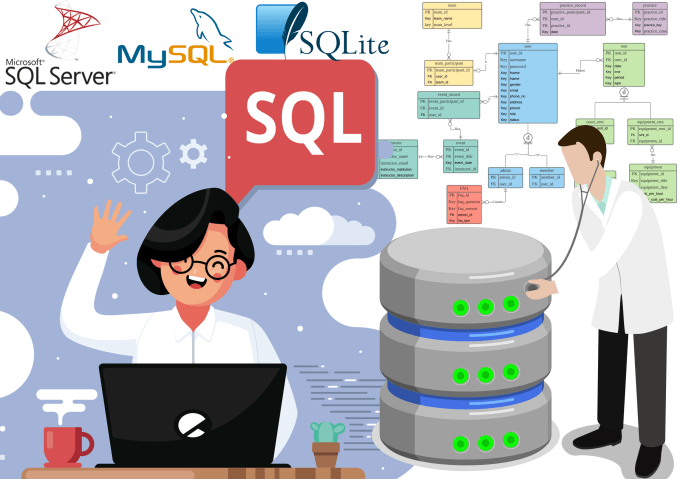

### DBMS

In [180]:
import sqlite3
import random

### Create Database

In [181]:
conn1 = sqlite3.connect('Fresh_IBDM_4M.db')

### Create Cursor

In [182]:
# Declare Cursor
cur = conn1.cursor()

### Create TABLE1
Table 1: Sno, MovieName, Director Name, Duration, genre, ratings

In [185]:
#Create table1
cur.execute("CREATE TABLE TABLE1( Sno INT PRIMARY KEY, MovieName TEXT, Director1Name TEXT, Director2Name TEXT, Duration INT, genre1 TEXT, genre2 TEXT, genre3 TEXT, ratings REAL)")

In [186]:
#for inserting data in TABLE1 first get those columns from files using pandas.dataframe
#Load the file1 and file2 data into dataframe
import pandas as pd
first_df = pd.read_csv('IMDb_file1.csv')
first_df.head(3)

Sno                                      MovieName           Director1  \
0   1            Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
1   2                                The Dark Knight   Christopher Nolan   
2   3  The Lord of the Rings: The Return of the King       Peter Jackson   

     Director2  Duration  year  ratings Metascore  
0  Kemp Powers       140  2023      9.1        86  
1            -       152  2008      9.0        84  
2            -       201  2003      9.0        94

In [187]:
first_df.head(2)

Sno                            MovieName           Director1    Director2  \
0   1  Spider-Man: Across the Spider-Verse  Joaquim Dos Santos  Kemp Powers   
1   2                      The Dark Knight   Christopher Nolan            -   

   Duration  year  ratings Metascore  
0       140  2023      9.1        86  
1       152  2008      9.0        84

### Create TABLE2
Table 2: Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

In [188]:
cur.execute("drop TABLE TABLE2")

In [189]:
#Added Sno As foreign key in TABLE2 to add intergrity constrant which is useful for executing subqueries further.
cur.execute("CREATE TABLE TABLE2(Sno INT, MovieName TEXT, star1 TEXT, star2 TEXT, star3 TEXT, star4 TEXT, votes INT, genre1 TEXT, genre2 TEXT, genre3 TEXT, Grosscollection REAL, popularity int, Certification text, foreign Key(Sno) references TABLE1(Sn0))")

In [190]:
second_df = pd.read_csv('IMDb_file2.csv')
#second_df.rename(columns= {'Movie Name':'MovieName'}, inplace = True)
second_df.head(3)

Sno                                      MovieName           star1  \
0   1            Spider-Man: Across the Spider-Verse   Shameik Moore   
1   2                                The Dark Knight  Christian Bale   
2   3  The Lord of the Rings: The Return of the King     Elijah Wood   

           star2          star3              star4       votes     genre1  \
0    Oscar Isaac    Oscar Isaac  Luna Lauren Velez      40,185  Animation   
1  Aaron Eckhart  Aaron Eckhart      Michael Caine  2,719,685      Action   
2   Ian McKellen   Ian McKellen      Orlando Bloom  1,887,962      Action   

      genre2     genre3 Grosscollection popularity Certification  
0     Action  Adventure               -         23            PG  
1      Crime      Drama          534.86        117         PG-13  
2  Adventure      Drama          377.85        407         PG-13

In [191]:
first_df.columns

Index(['Sno', 'MovieName', 'Director1', 'Director2', 'Duration', 'year',
       'ratings', 'Metascore'],
      dtype='object')

In [192]:
#Storing the column values into list which used latter to insert enteries into Table1
Sno = []
Sno = first_df['Sno']
len(Sno)

1750

In [193]:
MovieName = []
MovieName = first_df['MovieName']
len(MovieName)

1750

In [194]:
Director1Name = []
Director1Name = first_df['Director1']
Director2Name = first_df['Director2']
len(Director1Name),len(Director2Name)

(1750, 1750)

In [195]:
Duration = []
Duration = first_df['Duration']
len(Duration)

1750

In [196]:
genre1 = []
genre1 = second_df['genre1']
genre2 = []
genre2 = second_df['genre2']
genre3 = []
genre3 =second_df['genre3']
len(genre1),len(genre2),len(genre3)

(1750, 1750, 1750)

In [197]:
ratings = []
ratings = first_df['ratings']
len(ratings)

1750

In [198]:
MY_Table1_columns = [Sno, MovieName, Director1Name, Director2Name, Duration, genre1, genre2, genre3, ratings]

In [199]:
#for creating text file create pandas dataframe for required above mentioned column names and save it as csv file 
Table_1_IMDb_df = pd.DataFrame({ "Sno":Sno, "MovieName":MovieName, "Director1Name":Director1Name, "Director2Name":Director2Name, "Duration":Duration, "genre1":genre1, "genre2":genre2, "genre3":genre3, "ratings":ratings})
Table_1_IMDb_df

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

           Director1Name  Director2Name  Duration     genre1     genre2  \
0     Joaquim Dos Santos    Kemp Powers       140  Animation     Action   
1      Christopher Nolan              -       152     Action      Crime   
2          Peter Jackson              -       201     Action  Adventure   
3      Christopher Nolan              -       148     Action  Adventure   
4          Peter Jackson              -       178     Action  Adventure   
...                  ...            ...       ...        ...        ...   
1745            Uwe Boll              -        90     Action  Adventure   
1746         Prabhu Deva              -       109     Action      Crime   
1747        Remo D'Souza              -       160     Action      Crime   
1748           Sean Cain  Enzo Zelocchi        85     Action    Fantasy   
1749       Keith English              -       125     Action      Crime   

         genre3  ratings  
0     Adventure      9.1  
1         Drama      9.0  
2         Drama      9.0  
3        Sci-Fi      8.8  
4         Drama      8.8  
...         ...      ...  
1745     Horror      2.1  
1746   Thriller      1.9  
1747   Thriller      1.9  
1748     Sci-Fi      1.7  
1749      Drama      1.5  

[1750 rows x 9 columns]

In [200]:
##***************************store the df_Table1 dataframe in csv file named 'DT_IMDbTable_1.csv'*****************************

#Table1 entries are in this file name 'DT_IMDbTable_1.csv' diresctly use this file to insert entries into table

Table_1_IMDb_df.to_csv("DT__Table_1IMDb.csv",index=False)

### Load the csv file1 into SQL table1


In [201]:
import pandas as pd
# load the data into a Pandas DataFrame
TABLE1 = pd.read_csv("DT__Table_1IMDb.csv")
# write the data to a sqlite table
TABLE1.to_sql('TABLE1', conn1, if_exists='append', index = False)

1750

In [202]:
conn1.commit()

### Querying the table(1) in the  SQL workbench / SQLite database :

In [203]:
result = cur.execute("Select MovieName from TABLE1 where ratings=8.5")
for i in result:
    print(i)

('Léon: The Professional',)
('Gladiator',)


In [204]:
TABLE1

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

           Director1Name  Director2Name  Duration     genre1     genre2  \
0     Joaquim Dos Santos    Kemp Powers       140  Animation     Action   
1      Christopher Nolan              -       152     Action      Crime   
2          Peter Jackson              -       201     Action  Adventure   
3      Christopher Nolan              -       148     Action  Adventure   
4          Peter Jackson              -       178     Action  Adventure   
...                  ...            ...       ...        ...        ...   
1745            Uwe Boll              -        90     Action  Adventure   
1746         Prabhu Deva              -       109     Action      Crime   
1747        Remo D'Souza              -       160     Action      Crime   
1748           Sean Cain  Enzo Zelocchi        85     Action    Fantasy   
1749       Keith English              -       125     Action      Crime   

         genre3  ratings  
0     Adventure      9.1  
1         Drama      9.0  
2         Drama      9.0  
3        Sci-Fi      8.8  
4         Drama      8.8  
...         ...      ...  
1745     Horror      2.1  
1746   Thriller      1.9  
1747   Thriller      1.9  
1748     Sci-Fi      1.7  
1749      Drama      1.5  

[1750 rows x 9 columns]

In [205]:
#1)  Display all the details of movies created by directors Christopher and Matt Reeves.
result1 = cur.execute('Select * from TABLE1 where Director1Name LIKE "Christopher%" OR Director1Name = "Matt Reeves" OR Director2Name LIKE "Christopher%" OR Director2Name = "Matt Reeves"')
for i in result1:
    print(i)

(2, 'The Dark Knight', 'Christopher Nolan', '-', 152, 'Action', 'Crime', 'Drama', 9.0)
(4, 'Inception', 'Christopher Nolan', '-', 148, 'Action', 'Adventure', 'Sci-Fi', 8.8)
(22, 'The Dark Knight Rises', 'Christopher Nolan', '-', 164, 'Action', 'Drama', 'Thriller', 8.4)
(43, 'Batman Begins', 'Christopher Nolan', '-', 140, 'Action', 'Crime', 'Drama', 8.2)
(131, 'The Batman', 'Matt Reeves', '-', 176, 'Action', 'Crime', 'Drama', 7.8)
(139, 'Dunkirk', 'Christopher Nolan', '-', 106, 'Action', 'Drama', 'History', 7.8)
(167, 'Mission: Impossible - Fallout', 'Christopher McQuarrie', '-', 147, 'Action', 'Adventure', 'Thriller', 7.7)
(172, 'The Lego Movie', 'Phil Lord', 'Christopher Miller', 100, 'Animation', 'Action', 'Adventure', 7.7)
(224, 'Dawn of the Planet of the Apes', 'Matt Reeves', '-', 130, 'Action', 'Adventure', 'Drama', 7.6)
(293, 'Mission: Impossible - Rogue Nation', 'Christopher McQuarrie', '-', 131, 'Action', 'Adventure', 'Thriller', 7.4)
(306, 'War for the Planet of the Apes', 'Ma

In [206]:
#2) Display all the details of movies with a duration of 140 minutes to 190 minutes.
result2 = cur.execute("Select * from TABLE1 where Duration >= 140 AND Duration <= 190")
for i in result2:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 140, 'Animation', 'Action', 'Adventure', 9.1)
(2, 'The Dark Knight', 'Christopher Nolan', '-', 152, 'Action', 'Crime', 'Drama', 9.0)
(4, 'Inception', 'Christopher Nolan', '-', 148, 'Action', 'Adventure', 'Sci-Fi', 8.8)
(5, 'The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '-', 178, 'Action', 'Adventure', 'Drama', 8.8)
(6, 'The Lord of the Rings: The Two Towers', 'Peter Jackson', '-', 179, 'Action', 'Adventure', 'Drama', 8.8)
(9, 'Soorarai Pottru', 'Sudha Kongara', '-', 153, 'Action', 'Drama', '-', 8.7)
(14, 'Sita Ramam', 'Hanu Raghavapudi', '-', 163, 'Action', 'Drama', 'Mystery', 8.6)
(16, 'Gladiator', 'Ridley Scott', '-', 155, 'Action', 'Adventure', 'Drama', 8.5)
(18, 'Avengers: Endgame', 'Anthony Russo', 'Joe Russo', 181, 'Action', 'Adventure', 'Drama', 8.4)
(20, 'Avengers: Infinity War', 'Anthony Russo', 'Joe Russo', 149, 'Action', 'Adventure', 'Sci-Fi', 8.4)
(22, 'The Dark Knight Ris

In [207]:
#3) Display all details of movies with ratings above 7 in ascending order.
Result3 = cur.execute("Select * from TABLE1 where ratings > 7 order by ratings asc")
for i in Result3:
    print(i)

(431, 'Furious 7', 'James Wan', '-', 137, 'Action', 'Crime', 'Thriller', 7.1)
(432, 'The Mummy', 'Stephen Sommers', '-', 124, 'Action', 'Adventure', 'Fantasy', 7.1)
(433, 'Mission: Impossible', 'Brian De Palma', '-', 110, 'Action', 'Adventure', 'Thriller', 7.1)
(434, 'Free Guy', 'Shawn Levy', '-', 115, 'Action', 'Adventure', 'Comedy', 7.1)
(435, 'Wrath of Man', 'Guy Ritchie', '-', 119, 'Action', 'Crime', 'Thriller', 7.1)
(436, 'Tropic Thunder', 'Ben Stiller', '-', 107, 'Action', 'Comedy', 'War', 7.1)
(437, 'Prey', 'Dan Trachtenberg', '-', 100, 'Action', 'Adventure', 'Drama', 7.1)
(438, 'Man of Steel', 'Zack Snyder', '-', 143, 'Action', 'Adventure', 'Sci-Fi', 7.1)
(439, 'Everest', 'Baltasar Kormákur', '-', 121, 'Action', 'Adventure', 'Biography', 7.1)
(440, 'Blade', 'Stephen Norrington', '-', 120, 'Action', 'Horror', 'Sci-Fi', 7.1)
(441, 'Shooter', 'Antoine Fuqua', '-', 124, 'Action', 'Drama', 'Thriller', 7.1)
(442, 'Batman Returns', 'Tim Burton', '-', 126, 'Action', 'Crime', 'Fantasy',

In [208]:
#4) Display all movie names in descending order.
Results4 = cur.execute("Select MovieName from TABLE1 order by MovieName desc")
Results4.fetchall()

[('Æon Flux',),
 ('xXx: State of the Union',),
 ('xXx: Return of Xander Cage',),
 ('xXx',),
 ('Zoolander 2',),
 ('Zombieland: Double Tap',),
 ('Zombieland',),
 ('Zathura: A Space Adventure',),
 ("Zack Snyder's Justice League",),
 ('Your Highness',),
 ('Young Guns II',),
 ('Young Guns',),
 ('You Only Live Twice',),
 ("You Don't Mess with the Zohan",),
 ('Yojimbo',),
 ('X2: X-Men United',),
 ('X-Men: The Last Stand',),
 ('X-Men: First Class',),
 ('X-Men: Days of Future Past',),
 ('X-Men: Dark Phoenix',),
 ('X-Men: Apocalypse',),
 ('X-Men Origins: Wolverine',),
 ('X-Men',),
 ('Wyatt Earp',),
 ('Wrongfully Accused',),
 ('Wrath of the Titans',),
 ('Wrath of Man',),
 ('World War Z',),
 ('Wonder Woman 1984',),
 ('Wonder Woman',),
 ('Wolfwalkers',),
 ('Without Remorse',),
 ('Windtalkers',),
 ("Willy's Wonderland",),
 ('Willow',),
 ('Wild Wild West',),
 ('Wild Target',),
 ('Wild Hogs',),
 ('Wild Card',),
 ('Who Am I?',),
 ('Whiteout',),
 ('White House Down',),
 ('White Heat',),
 ('Where Eagles 

In [209]:
#5) Display movie name starts with ‘P’ and their rating is greater than 7.
Result5 = cur.execute("Select MovieName from TABLE1 where MovieName like 'P%' and ratings > 7")
Result5.fetchall()

[('Princess Mononoke',),
 ('Paan Singh Tomar',),
 ('Pirates of the Caribbean: The Curse of the Black Pearl',),
 ('Predator',),
 ('Ponniyin Selvan: Part I',),
 ('Pushpa: The Rise - Part 1',),
 ('Police Story',),
 ('Predestination',),
 ("Pirates of the Caribbean: Dead Man's Chest",),
 ('Patriots Day',),
 ('Point Break',),
 ('Prey',),
 ("Pirates of the Caribbean: At World's End",),
 ('Planet Terror',),
 ('Payback',)]

### Load the csv 'IMDb_file2.csv' file into SQL table 


In [210]:
import pandas as pd
# load the data into a Pandas DataFrame
TABLE2 = pd.read_csv('IMDb_file2.csv')
# write the data to a sqlite table
TABLE2.to_sql('TABLE2', conn1, if_exists='append', index = False)

1750

In [211]:
conn1.commit()

### Querying the table(2) in the  SQL workbench / SQLite database :

In [212]:
TABLE2

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 13 columns]

In [213]:
#1) Display all movie names with star Arnold Schwarzenegger in ascending order.
T2_Result1 = cur.execute('Select MovieName from TABLE2 where star1 = "Arnold Schwarzenegger" OR star2 = "Arnold Schwarzenegger" OR star3 = "Arnold Schwarzenegger" OR star4 = "Arnold Schwarzenegger" order by MovieName asc')
T2_Result1.fetchall()

[('Batman & Robin',),
 ('Collateral Damage',),
 ('Commando',),
 ('Conan the Barbarian',),
 ('Conan the Destroyer',),
 ('End of Days',),
 ('Eraser',),
 ('Kindergarten Cop',),
 ('Last Action Hero',),
 ('Predator',),
 ('Raw Deal',),
 ('Red Heat',),
 ('Red Sonja',),
 ('Sabotage',),
 ('Terminator 2: Judgment Day',),
 ('Terminator 3: Rise of the Machines',),
 ('Terminator Genisys',),
 ('The 6th Day',),
 ('The Last Stand',),
 ('The Running Man',),
 ('The Terminator',),
 ('Total Recall',),
 ('True Lies',)]

In [214]:
#T2_Result2 = cur.execute("Select max(votes) from TABLE2")
#T2_Result2.fetchone()

In [215]:
#2) Display all details of the movie with the highest number of votes.

T2_Result2 = cur.execute("Select * from TABLE2 where votes=(Select MAX(votes) from TABLE2)  group by MovieName")
for i in T2_Result2:
    print(i)

('1,019', 'The American', 'George Clooney', 'Violante Placido', 'Violante Placido', 'Irina Björklund', '99,931 ', 'Action', 'Crime', 'Drama', 35.61, '2,657', 'R')


In [216]:
resl = cur.execute("Select MAX(votes) from TABLE2")
print("MAX(votes):",resl.fetchone())

MAX(votes): ('99,931 ',)


In [217]:
#3) Display movie names with gross collections in descending order.
T_Result3 = cur.execute("Select Moviename from TABLE2 order by Grosscollection desc ")
for i in T_Result3:
    print(i)

('Spider-Man: Across the Spider-Verse',)
('Soorarai Pottru',)
('Harakiri',)
('Sita Ramam',)
('Kaithi',)
('Asuran',)
('Kantara',)
('Vikram',)
('Raatchasan',)
('Shershaah',)
('Guardians of the Galaxy Vol. 3',)
('Gangs of Wasseypur',)
('Vikram Vedha',)
('Yojimbo',)
('K.G.F: Chapter 1',)
('The Mountain II',)
('Neon Genesis Evangelion: The End of Evangelion',)
('Sholay',)
('The Hidden Fortress',)
('White Heat',)
('A Wednesday',)
('Major',)
('Sarfarosh',)
('Hera Pheri',)
('Kaththi',)
('Thuppakki',)
('John Wick: Chapter 4',)
('Ip Man',)
('Wolfwalkers',)
('Sanjuro',)
('Andaz Apna Apna',)
('Karthikeya 2',)
('Arjun Reddy',)
('1: Nenokkadine',)
('The Breath',)
("Zack Snyder's Justice League",)
('Baby',)
('Airlift',)
('Vishwaroopam',)
('All Quiet on the Western Front',)
('Thirteen Lives',)
('The Chaser',)
('Aguirre, the Wrath of God',)
('Ninja Scroll',)
('The Killer',)
('Minnal Murali',)
('Bonnie and Clyde',)
('Badlands',)
('Ponniyin Selvan: Part I',)
('Key Largo',)
('Hard Boiled',)
('Scarface',)


In [218]:
##CROSS CHECK FOR Query 3)
T_Result3_1 = cur.execute("Select Moviename,Grosscollection from TABLE2 order by Grosscollection desc ")
for i in T_Result3_1:
    print(i)

('Spider-Man: Across the Spider-Verse', '-')
('Soorarai Pottru', '-')
('Harakiri', '-')
('Sita Ramam', '-')
('Kaithi', '-')
('Asuran', '-')
('Kantara', '-')
('Vikram', '-')
('Raatchasan', '-')
('Shershaah', '-')
('Guardians of the Galaxy Vol. 3', '-')
('Gangs of Wasseypur', '-')
('Vikram Vedha', '-')
('Yojimbo', '-')
('K.G.F: Chapter 1', '-')
('The Mountain II', '-')
('Neon Genesis Evangelion: The End of Evangelion', '-')
('Sholay', '-')
('The Hidden Fortress', '-')
('White Heat', '-')
('A Wednesday', '-')
('Major', '-')
('Sarfarosh', '-')
('Hera Pheri', '-')
('Kaththi', '-')
('Thuppakki', '-')
('John Wick: Chapter 4', '-')
('Ip Man', '-')
('Wolfwalkers', '-')
('Sanjuro', '-')
('Andaz Apna Apna', '-')
('Karthikeya 2', '-')
('Arjun Reddy', '-')
('1: Nenokkadine', '-')
('The Breath', '-')
("Zack Snyder's Justice League", '-')
('Baby', '-')
('Airlift', '-')
('Vishwaroopam', '-')
('All Quiet on the Western Front', '-')
('Thirteen Lives', '-')
('The Chaser', '-')
('Aguirre, the Wrath of God

In [219]:
#4) Display the gross collection of movies with the star Arnold
T2_Result4 = cur.execute('Select Grosscollection from TABLE2 where star1 LIKE "Arnold%" OR star2 LIKE "Arnold%" OR star3 LIKE "Arnold%" OR star4 LIKE "Arnold%"')
T2_Result4.fetchall()

[(204.84,),
 (38.4,),
 (59.74,),
 (119.39,),
 (146.28,),
 (155.25,),
 (39.57,),
 (38.12,),
 (35.1,),
 (50.02,),
 (202.02,),
 (89.76,),
 (12.05,),
 (150.37,),
 (91.46,),
 (101.3,),
 (34.99,),
 (31.04,),
 (34.6,),
 (66.89,),
 (10.51,),
 (16.21,),
 (40.08,),
 (6.95,),
 (107.33,)]

In [220]:
#Cross check for query_no(4)
T2_Result1_4 = cur.execute("Select MovieName, Grosscollection, star1, star2, star3, star4 from TABLE2 where star1 like 'Arnold Schwarzenegger%' or star2 like 'Arnold Schwarzenegger%' or star3 like 'Arnold Schwarzenegger%' or star4 like 'Arnold Schwarzenegger%'")
for i in T2_Result1_4:
    print(i)

('Terminator 2: Judgment Day', 204.84, 'Arnold Schwarzenegger', 'Edward Furlong', 'Edward Furlong', 'Robert Patrick')
('The Terminator', 38.4, 'Arnold Schwarzenegger', 'Michael Biehn', 'Michael Biehn', 'Paul Winfield')
('Predator', 59.74, 'Arnold Schwarzenegger', 'Kevin Peter Hall', 'Kevin Peter Hall', 'Elpidia Carrillo')
('Total Recall', 119.39, 'Arnold Schwarzenegger', 'Michael Ironside', 'Michael Ironside', 'Rachel Ticotin')
('True Lies', 146.28, 'Arnold Schwarzenegger', 'Tom Arnold', 'Tom Arnold', 'Bill Paxton')
('Conan the Barbarian', 39.57, 'Arnold Schwarzenegger', 'Max von Sydow', 'Max von Sydow', 'Sandahl Bergman')
('The Running Man', 38.12, 'Arnold Schwarzenegger', 'Yaphet Kotto', 'Yaphet Kotto', 'Jim Brown')
('Commando', 35.1, 'Arnold Schwarzenegger', 'Dan Hedaya', 'Dan Hedaya', 'Vernon Wells')
('Last Action Hero', 50.02, 'Arnold Schwarzenegger', 'Art Carney', 'Art Carney', 'Charles Dance')
('Terminator Genisys', 89.76, 'Arnold Schwarzenegger', 'Emilia Clarke', 'Emilia Clarke

In [221]:
#5) Display all details of movies with comedy and action genres.
T2_Result_5 = cur.execute('Select * from TABLE2 where genre1 LIKE "comedy%" OR genre2 LIKE "comedy%" OR genre3 LIKE "comedy%" AND genre1 LIKE "action" OR genre2 LIKE "action" OR genre3 LIKE "action"')
for i in T2_Result_5:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Shameik Moore', 'Oscar Isaac', 'Oscar Isaac', 'Luna Lauren Velez', '40,185', 'Animation', 'Action', 'Adventure', '-', 23, 'PG')
(17, 'Spider-Man: Into the Spider-Verse', 'Shameik Moore', 'Hailee Steinfeld', 'Hailee Steinfeld', 'Mahershala Ali', '570,202 ', 'Animation', 'Action', 'Adventure', 190.24, 86, 'PG')
(29, 'Princess Mononoke', 'Yôji Matsuda', 'Yûko Tanaka', 'Yûko Tanaka', 'Billy Crudup', '406,979 ', 'Animation', 'Action', 'Adventure', 2.38, '1,446', 'PG-13')
(37, 'Guardians of the Galaxy Vol. 3', 'Chris Pratt', 'Bradley Cooper', 'Bradley Cooper', 'Pom Klementieff', '155,615', 'Action', 'Adventure', 'Comedy', '-', 3, 'PG-13')
(46, 'Demon Slayer the Movie: Mugen Train', 'Natsuki Hanae', 'Yoshitsugu Matsuoka', 'Yoshitsugu Matsuoka', 'Hiro Shimono', '64,456 ', 'Animation', 'Action', 'Adventure', 47.7, '2,043', 'R')
(48, 'Gangs of Wasseypur', 'Manoj Bajpayee', 'Tigmanshu Dhulia', 'Tigmanshu Dhulia', 'Richa Chadha', '99,391', 'Action', 'Com

## Subquery

In [222]:
TABLE1

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

           Director1Name  Director2Name  Duration     genre1     genre2  \
0     Joaquim Dos Santos    Kemp Powers       140  Animation     Action   
1      Christopher Nolan              -       152     Action      Crime   
2          Peter Jackson              -       201     Action  Adventure   
3      Christopher Nolan              -       148     Action  Adventure   
4          Peter Jackson              -       178     Action  Adventure   
...                  ...            ...       ...        ...        ...   
1745            Uwe Boll              -        90     Action  Adventure   
1746         Prabhu Deva              -       109     Action      Crime   
1747        Remo D'Souza              -       160     Action      Crime   
1748           Sean Cain  Enzo Zelocchi        85     Action    Fantasy   
1749       Keith English              -       125     Action      Crime   

         genre3  ratings  
0     Adventure      9.1  
1         Drama      9.0  
2         Drama      9.0  
3        Sci-Fi      8.8  
4         Drama      8.8  
...         ...      ...  
1745     Horror      2.1  
1746   Thriller      1.9  
1747   Thriller      1.9  
1748     Sci-Fi      1.7  
1749      Drama      1.5  

[1750 rows x 9 columns]

In [223]:
TABLE2

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 13 columns]

In [224]:
#1) Display all details from both tables where movie names are the same.
ResultSQ_1 = cur.execute("select * from TABLE1, TABLE2 where TABLE1.MovieName = TABLE2.MovieName")
for i in ResultSQ_1:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 140, 'Animation', 'Action', 'Adventure', 9.1, 1, 'Spider-Man: Across the Spider-Verse', 'Shameik Moore', 'Oscar Isaac', 'Oscar Isaac', 'Luna Lauren Velez', '40,185', 'Animation', 'Action', 'Adventure', '-', 23, 'PG')
(2, 'The Dark Knight', 'Christopher Nolan', '-', 152, 'Action', 'Crime', 'Drama', 9.0, 2, 'The Dark Knight', 'Christian Bale', 'Aaron Eckhart', 'Aaron Eckhart', 'Michael Caine', '2,719,685 ', 'Action', 'Crime', 'Drama', 534.86, 117, 'PG-13')
(3, 'The Lord of the Rings: The Return of the King', 'Peter Jackson', '-', 201, 'Action', 'Adventure', 'Drama', 9.0, 3, 'The Lord of the Rings: The Return of the King', 'Elijah Wood', 'Ian McKellen', 'Ian McKellen', 'Orlando Bloom', '1,887,962 ', 'Action', 'Adventure', 'Drama', 377.85, 407, 'PG-13')
(4, 'Inception', 'Christopher Nolan', '-', 148, 'Action', 'Adventure', 'Sci-Fi', 8.8, 4, 'Inception', 'Leonardo DiCaprio', 'Elliot Page', 'Elliot Page', 'Ken Wa

In [225]:
#2)   Display all movie names, Director, ratings, and gross collection where the genre is action.


### FOR SUBQURIES MERGE BOTH TABLE AS FOLLOW:

In [226]:
#Merger two tables
result__df_3 = pd.merge(first_df, second_df)

In [227]:
result__df_3.columns

Index(['Sno', 'MovieName', 'Director1', 'Director2', 'Duration', 'year',
       'ratings', 'Metascore', 'star1', 'star2', 'star3', 'star4', 'votes',
       'genre1', 'genre2', 'genre3', 'Grosscollection', 'popularity',
       'Certification'],
      dtype='object')

In [228]:
#Save the merged dataframes into file 
result__df_3.to_csv('IMDb___MergreTABLE1_TABLE2.csv',index=False)

In [229]:
result__df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              1750 non-null   object 
 1   MovieName        1750 non-null   object 
 2   Director1        1750 non-null   object 
 3   Director2        1750 non-null   object 
 4   Duration         1750 non-null   int64  
 5   year             1750 non-null   object 
 6   ratings          1750 non-null   float64
 7   Metascore        1750 non-null   object 
 8   star1            1750 non-null   object 
 9   star2            1750 non-null   object 
 10  star3            1750 non-null   object 
 11  star4            1750 non-null   object 
 12  votes            1750 non-null   object 
 13  genre1           1750 non-null   object 
 14  genre2           1750 non-null   object 
 15  genre3           1750 non-null   object 
 16  Grosscollection  1750 non-null   object 
 17  popularity    

### Create 3rd table for TABLE1_TABLE2_Mergre 

In [230]:
cur.execute("DROP TABLE TABLE3")

In [231]:
#create 3rd table
cur.execute("CREATE TABLE TABLE3(Sno INT, MovieName TEXT, Director1 TEXT, Director2 TEXT, Duration INT, year INT, ratings REAL, Metascore REAL, star1 TEXT, star2 TEXT, star3 TEXT, star4 TEXT, votes INT,genre1 TEXT, genre2 TEXT, genre3 TEXT, Grosscollection TEXT, popularity TEXT, Certification TEXT)")
print("TABLE3 is created sucessfully.......")

TABLE3 is created sucessfully.......


### Load the csv file into SQL table


In [232]:
import pandas as pd

#load the data into pandas dataframe
TABLE3 = pd.read_csv('IMDb___MergreTABLE1_TABLE2.csv')

# write the data to a sqlite table
TABLE3.to_sql('TABLE3', conn1, if_exists='append', index =False)

1750

In [233]:
conn1.commit()

In [234]:
TABLE3.head(6)

Sno                                          MovieName           Director1  \
0   1                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
1   2                                    The Dark Knight   Christopher Nolan   
2   3      The Lord of the Rings: The Return of the King       Peter Jackson   
3   4                                          Inception   Christopher Nolan   
4   5  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
5   6              The Lord of the Rings: The Two Towers       Peter Jackson   

     Director2  Duration  year  ratings Metascore              star1  \
0  Kemp Powers       140  2023      9.1        86      Shameik Moore   
1            -       152  2008      9.0        84     Christian Bale   
2            -       201  2003      9.0        94        Elijah Wood   
3            -       148  2010      8.8        74  Leonardo DiCaprio   
4            -       178  2001      8.8        92        Elijah Wood   
5            -       179  2002      8.8        87        Elijah Wood   

             star2            star3              star4       votes     genre1  \
0      Oscar Isaac      Oscar Isaac  Luna Lauren Velez      40,185  Animation   
1    Aaron Eckhart    Aaron Eckhart      Michael Caine  2,719,685      Action   
2     Ian McKellen     Ian McKellen      Orlando Bloom  1,887,962      Action   
3      Elliot Page      Elliot Page       Ken Watanabe  2,414,252      Action   
4    Orlando Bloom    Orlando Bloom          Sean Bean  1,916,577      Action   
5  Viggo Mortensen  Viggo Mortensen      Orlando Bloom  1,704,037      Action   

      genre2     genre3 Grosscollection popularity Certification  
0     Action  Adventure               -         23            PG  
1      Crime      Drama          534.86        117         PG-13  
2  Adventure      Drama          377.85        407         PG-13  
3  Adventure     Sci-Fi          292.58        103         PG-13  
4  Adventure      Drama          315.54        184         PG-13  
5  Adventure      Drama          342.55        788         PG-13

### Subquery :

In [235]:
#1) Display all details from both tables where movie names are the same.
ResultSQ_1 = cur.execute("Select * from TABLE1 T1,TABLE2 T2 where T1.MovieName = T2.MovieName")
for i in ResultSQ_1:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 140, 'Animation', 'Action', 'Adventure', 9.1, 1, 'Spider-Man: Across the Spider-Verse', 'Shameik Moore', 'Oscar Isaac', 'Oscar Isaac', 'Luna Lauren Velez', '40,185', 'Animation', 'Action', 'Adventure', '-', 23, 'PG')
(2, 'The Dark Knight', 'Christopher Nolan', '-', 152, 'Action', 'Crime', 'Drama', 9.0, 2, 'The Dark Knight', 'Christian Bale', 'Aaron Eckhart', 'Aaron Eckhart', 'Michael Caine', '2,719,685 ', 'Action', 'Crime', 'Drama', 534.86, 117, 'PG-13')
(3, 'The Lord of the Rings: The Return of the King', 'Peter Jackson', '-', 201, 'Action', 'Adventure', 'Drama', 9.0, 3, 'The Lord of the Rings: The Return of the King', 'Elijah Wood', 'Ian McKellen', 'Ian McKellen', 'Orlando Bloom', '1,887,962 ', 'Action', 'Adventure', 'Drama', 377.85, 407, 'PG-13')
(4, 'Inception', 'Christopher Nolan', '-', 148, 'Action', 'Adventure', 'Sci-Fi', 8.8, 4, 'Inception', 'Leonardo DiCaprio', 'Elliot Page', 'Elliot Page', 'Ken Wa

In [236]:
#2)  Display all movie names, Director, ratings, and gross collection where the genre is action.
ResultSQ_2 = cur.execute("Select MovieName, Director1, Director2, ratings, Grosscollection from TABLE3 where genre1 like 'action%' OR genre2 like 'action%' OR genre3 like 'action%'")
for i in ResultSQ_2:
    print(i)

('Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 9.1, '-')
('The Dark Knight', 'Christopher Nolan', '-', 9.0, '534.86')
('The Lord of the Rings: The Return of the King', 'Peter Jackson', '-', 9.0, '377.85')
('Inception', 'Christopher Nolan', '-', 8.8, '292.58')
('The Lord of the Rings: The Fellowship of the Ring', 'Peter Jackson', '-', 8.8, '315.54')
('The Lord of the Rings: The Two Towers', 'Peter Jackson', '-', 8.8, '342.55')
('The Matrix', 'Lana Wachowski', 'Lilly Wachowski', 8.7, '171.48')
('Star Wars: Episode V - The Empire Strikes Back', 'Irvin Kershner', '-', 8.7, '290.48')
('Soorarai Pottru', 'Sudha Kongara', '-', 8.7, '-')
('Star Wars: Episode IV - A New Hope', 'George Lucas', '-', 8.6, '322.74')
('Terminator 2: Judgment Day', 'James Cameron', '-', 8.6, '204.84')
('Seven Samurai', 'Akira Kurosawa', '-', 8.6, '0.27')
('Harakiri', 'Masaki Kobayashi', '-', 8.6, '-')
('Sita Ramam', 'Hanu Raghavapudi', '-', 8.6, '-')
('Léon: The Professional', 'Luc Besso

In [237]:
#cross check for above query ans its correct
Resultjust = cur.execute("select MovieName from TABLE3 where genre1 like 'action%' OR genre2 like 'action%' OR genre3 like 'action%'")
for i in Resultjust:
    print(i)

('Spider-Man: Across the Spider-Verse',)
('The Dark Knight',)
('The Lord of the Rings: The Return of the King',)
('Inception',)
('The Lord of the Rings: The Fellowship of the Ring',)
('The Lord of the Rings: The Two Towers',)
('The Matrix',)
('Star Wars: Episode V - The Empire Strikes Back',)
('Soorarai Pottru',)
('Star Wars: Episode IV - A New Hope',)
('Terminator 2: Judgment Day',)
('Seven Samurai',)
('Harakiri',)
('Sita Ramam',)
('Léon: The Professional',)
('Gladiator',)
('Spider-Man: Into the Spider-Verse',)
('Avengers: Endgame',)
('Indiana Jones and the Raiders of the Lost Ark',)
('Avengers: Infinity War',)
('Oldboy',)
('The Dark Knight Rises',)
('Aliens',)
('Kaithi',)
('Asuran',)
('Top Gun: Maverick',)
('Heat',)
('Star Wars: Episode VI - Return of the Jedi',)
('Princess Mononoke',)
('North by Northwest',)
('Kantara',)
('Dangal',)
('K.G.F: Chapter 2',)
('Vikram',)
('Raatchasan',)
('Shershaah',)
('Guardians of the Galaxy Vol. 3',)
('Spider-Man: No Way Home',)
('Jurassic Park',)
('I

In [238]:
#3) Display all details from both tables with the highest gross collection.
ResultSQ_3 = cur.execute("Select * from TABLE3 where Grosscollection=(Select max(Grosscollection) from TABLE3) group by Grosscollection")
for i in ResultSQ_3:
    print(i)

(848, 'Olympus Has Fallen', 'Antoine Fuqua', '-', 119, 2013, 6.5, 41.0, 'Gerard Butler', 'Morgan Freeman', 'Morgan Freeman', 'Angela Bassett', '283,605 ', 'Action', 'Thriller', '-', '98.93', '1,123', 'R')


In [239]:
#Cross checked answer for (3) query 
RES = cur.execute("Select max(Grosscollection) from TABLE3")
RES.fetchall()
                  

[('98.93',)]

In [240]:
#(4) Display all details from both tables with the highest ratings
ResultSQ_4 = cur.execute("Select * from TABLE3 where ratings=(Select max(ratings) from TABLE3) group by MovieName")
for i in ResultSQ_4:
    print(i)

(1, 'Spider-Man: Across the Spider-Verse', 'Joaquim Dos Santos', 'Kemp Powers', 140, 2023, 9.1, 86.0, 'Shameik Moore', 'Oscar Isaac', 'Oscar Isaac', 'Luna Lauren Velez', '40,185', 'Animation', 'Action', 'Adventure', '-', '23', 'PG')


In [241]:
#Cross checked answer for 4) query 
RES = cur.execute("Select max(ratings) from TABLE3")
RES.fetchall()
           

[(9.1,)]

In [242]:
#5)Display all details from both tables with the lowest gross collection and lowest ratings
ResultSQ_5 = cur.execute("Select * from TABLE3 where Grosscollection=(select MIN(Grosscollection) from TABLE3) AND ratings=(Select MIN(ratings) from TABLE3) group by MovieName")
#ResultSQ_5.fetchall()
for i in ResultSQ_5:
    print(i)

('1,750', 'The Cost of Deception', 'Keith English', '-', 125, 2021, 1.5, '-', 'Vivianne Bánovits', 'Barna Bokor', 'Barna Bokor', 'Gabriella Gubás', '39,491', 'Action', 'Crime', 'Drama', '-', '-', '125 min')


In [243]:
MINGross = cur.execute("Select MIN(Grosscollection) from TABLE3")
MINGross.fetchone()

('-',)

In [244]:
MINrating = cur.execute("Select MIN(ratings) from TABLE3")
MINrating.fetchone()

(1.5,)

### Query solutions by using PANDAS SQL in the data frame.  
Dataframe1 for  Sno, MovieName, Director Name, Duration, genre, ratings

In [245]:
# Install pandassql on your machine. pandasql is a library that allows users to query DataFrames using SQL style syntax within pandas.

!pip install pandasql

In [246]:
#step 2 - import the libraries
import pandas as pd
from pandasql import sqldf

In [247]:
#to make queries easier and quicker create
pysqldf = lambda q: sqldf(q, globals())

In [248]:
#For table 1 dataframe first_df i already created 
first_df

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

               Director1      Director2  Duration  year  ratings Metascore  
0     Joaquim Dos Santos    Kemp Powers       140  2023      9.1        86  
1      Christopher Nolan              -       152  2008      9.0        84  
2          Peter Jackson              -       201  2003      9.0        94  
3      Christopher Nolan              -       148  2010      8.8        74  
4          Peter Jackson              -       178  2001      8.8        92  
...                  ...            ...       ...   ...      ...       ...  
1745            Uwe Boll              -        90  2003      2.1        15  
1746         Prabhu Deva              -       109  2021      1.9         -  
1747        Remo D'Souza              -       160  2018      1.9         -  
1748           Sean Cain  Enzo Zelocchi        85  2015      1.7         -  
1749       Keith English              -       125  2021      1.5         -  

[1750 rows x 8 columns]

In [249]:
#1)  Display all the details of movies created by directors Christopher and Matt Reeves.

q='''Select * from first_df where Director1 like "Christopher%" OR Director2 like "Christopher%" AND Director1 like "Christopher%" OR Director2="Matt Reeves"'''
df1 = pysqldf(q)
df1

#pysqldf("SELECT * FROM nyc where trip_distance>10")
# wall time

Sno                              MovieName              Director1  \
0       2                        The Dark Knight      Christopher Nolan   
1       4                              Inception      Christopher Nolan   
2      22                  The Dark Knight Rises      Christopher Nolan   
3      43                          Batman Begins      Christopher Nolan   
4     139                                Dunkirk      Christopher Nolan   
5     167          Mission: Impossible - Fallout  Christopher McQuarrie   
6     293     Mission: Impossible - Rogue Nation  Christopher McQuarrie   
7     322                                  Tenet      Christopher Nolan   
8     498                           Jack Reacher  Christopher McQuarrie   
9     641                             Young Guns       Christopher Cain   
10    825                     The Way of the Gun  Christopher McQuarrie   
11    973                            Black Death      Christopher Smith   
12  1,025  Scouts Guide to the Zombie Apocalypse     Christopher Landon   
13  1,701                    The Next Karate Kid       Christopher Cain   

   Director2  Duration  year  ratings Metascore  
0          -       152  2008      9.0        84  
1          -       148  2010      8.8        74  
2          -       164  2012      8.4        78  
3          -       140  2005      8.2        70  
4          -       106  2017      7.8        94  
5          -       147  2018      7.7        86  
6          -       131  2015      7.4        75  
7          -       150  2020      7.3        69  
8          -       130  2012      7.0        50  
9          -       107  1988      6.8        50  
10         -       119  2000      6.6        49  
11         -       102  2010      6.4        71  
12         -        93  2015      6.3        32  
13         -       107  1994      4.5        36

In [250]:
#2) Display all the details of movies with a duration of 140 minutes to 190 minutes.
q= '''Select * from first_df where Duration>=140 AND Duration<=190'''
df2 = pysqldf(q)
df2

Sno                                          MovieName  \
0        1                Spider-Man: Across the Spider-Verse   
1        2                                    The Dark Knight   
2        4                                          Inception   
3        5  The Lord of the Rings: The Fellowship of the Ring   
4        6              The Lord of the Rings: The Two Towers   
..     ...                                                ...   
200  1,738                                              Liger   
201  1,739                                             Gunday   
202  1,742                                        Heropanti 2   
203  1,743                                             Laxmii   
204  1,748                                             Race 3   

              Director1            Director2  Duration  year  ratings  \
0    Joaquim Dos Santos          Kemp Powers       140  2023      9.1   
1     Christopher Nolan                    -       152  2008      9.0   
2     Christopher Nolan                    -       148  2010      8.8   
3         Peter Jackson                    -       178  2001      8.8   
4         Peter Jackson                    -       179  2002      8.8   
..                  ...                  ...       ...   ...      ...   
200      Puri Jagannadh                    -       140  2022      2.7   
201     Ali Abbas Zafar                    -       152  2014      2.7   
202          Ahmed Khan                    -       145  2022      2.5   
203    Raghava Lawrence  Balakrishnan Thevar       141  2020      2.5   
204        Remo D'Souza                    -       160  2018      1.9   

    Metascore  
0          86  
1          84  
2          74  
3          92  
4          87  
..        ...  
200         -  
201         -  
202         -  
203         -  
204         -  

[205 rows x 8 columns]

In [254]:
#3) Display all details of movies with ratings above 7 in ascending order.
q ='''Select * from first_df where ratings > 7 order by ratings asc'''
df3 = pysqldf(q)
df3

Sno                                          MovieName  \
0    431                                          Furious 7   
1    432                                          The Mummy   
2    433                                Mission: Impossible   
3    434                                           Free Guy   
4    435                                       Wrath of Man   
..   ...                                                ...   
483    5  The Lord of the Rings: The Fellowship of the Ring   
484    6              The Lord of the Rings: The Two Towers   
485    2                                    The Dark Knight   
486    3      The Lord of the Rings: The Return of the King   
487    1                Spider-Man: Across the Spider-Verse   

              Director1    Director2  Duration  year  ratings Metascore  
0             James Wan            -       137  2015      7.1        67  
1       Stephen Sommers            -       124  1999      7.1        48  
2        Brian De Palma            -       110  1996      7.1        59  
3            Shawn Levy            -       115  2021      7.1        62  
4           Guy Ritchie            -       119  2021      7.1        57  
..                  ...          ...       ...   ...      ...       ...  
483       Peter Jackson            -       178  2001      8.8        92  
484       Peter Jackson            -       179  2002      8.8        87  
485   Christopher Nolan            -       152  2008      9.0        84  
486       Peter Jackson            -       201  2003      9.0        94  
487  Joaquim Dos Santos  Kemp Powers       140  2023      9.1        86  

[488 rows x 8 columns]

In [255]:
#4) Display all movie names in descending order.
q = '''Select MovieName from first_df'''
df3 = pysqldf(q)
df3.sort_values(by=['MovieName'], inplace=True, ascending=False)
df3



MovieName
1564                    Æon Flux
1697     xXx: State of the Union
1613  xXx: Return of Xander Cage
1368                         xXx
1677                 Zoolander 2
...                          ...
856                    12 Strong
1508                   12 Rounds
1638                   10,000 BC
421                          '71
1043                      #Alive

[1750 rows x 1 columns]

In [256]:
#5) Display movie name starts with ‘P’ and their rating is greater than 7.
q = '''Select MovieName from first_df where MovieName like "P%" AND ratings > 7'''
df5 = pysqldf(q)
df5

MovieName
0                                   Princess Mononoke
1                                    Paan Singh Tomar
2   Pirates of the Caribbean: The Curse of the Bla...
3                                            Predator
4                             Ponniyin Selvan: Part I
5                           Pushpa: The Rise - Part 1
6                                        Police Story
7                                      Predestination
8          Pirates of the Caribbean: Dead Man's Chest
9                                        Patriots Day
10                                        Point Break
11                                               Prey
12           Pirates of the Caribbean: At World's End
13                                      Planet Terror
14                                            Payback

### Query solutions by using PANDAS SQL in the data frame.  
Dataframe 2 Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

In [257]:
# second_df
second_df

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 13 columns]

In [258]:
#1) Display all movie names with star Arnold Schwarzenegger in ascending order.
q = '''Select MovieName from second_df where star1 = "Arnold Schwarzenegger" OR star2 = "Arnold Schwarzenegger" OR star3 = "Arnold Schwarzenegger" OR star4 = "Arnold Schwarzenegger"  '''
T2_df_1 = pysqldf(q)
T2_df_1.sort_values( by = ['MovieName'], inplace=True, ascending=True)
T2_df_1

MovieName
22                      Batman & Robin
20                   Collateral Damage
7                             Commando
5                  Conan the Barbarian
15                 Conan the Destroyer
17                         End of Days
13                              Eraser
12                    Kindergarten Cop
8                     Last Action Hero
2                             Predator
19                            Raw Deal
14                            Red Heat
21                           Red Sonja
18                            Sabotage
0           Terminator 2: Judgment Day
11  Terminator 3: Rise of the Machines
9                   Terminator Genisys
16                         The 6th Day
10                      The Last Stand
6                      The Running Man
1                       The Terminator
3                         Total Recall
4                            True Lies

In [259]:
max_price = second_df['votes'].max()
print (max_price)

99,931 


In [260]:
#2) Display all details of the movie with the highest number of votes.
q1 = 'Select * from second_df where votes=(Select MAX(votes) from second_df)  group by MovieName'
T2_df_3 = pysqldf(q1)
T2_df_3

Sno     MovieName           star1             star2             star3  \
0  1,019  The American  George Clooney  Violante Placido  Violante Placido   

             star4    votes  genre1 genre2 genre3 Grosscollection popularity  \
0  Irina Björklund  99,931   Action  Crime  Drama           35.61      2,657   

  Certification  
0             R

In [261]:
#3) Display movie names with gross collections in descending order.
q = '''Select MovieName from second_df order by Grosscollection desc'''
T2_df_3 = pysqldf(q)
T2_df_3

MovieName
0        Olympus Has Fallen
1          The Green Hornet
2          Inspector Gadget
3            Public Enemies
4           The Book of Eli
...                     ...
1745                 Laxmii
1746          The Prototype
1747                  Radhe
1748      Angels Apocalypse
1749  The Cost of Deception

[1750 rows x 1 columns]

In [262]:
#4) Display the gross collection of movies with the star Arnold.
q = 'Select Grosscollection from second_df where star1 LIKE "Arnold%" OR star2 LIKE "Arnold%" OR star3 LIKE "Arnold%" OR star4 LIKE "Arnold%"'
T2_df4 = pysqldf(q)
T2_df4 

Grosscollection
0           204.84
1            38.40
2            59.74
3           119.39
4           146.28
5           155.25
6            39.57
7            38.12
8            35.10
9            50.02
10          202.02
11           89.76
12           12.05
13          150.37
14           91.46
15          101.30
16           34.99
17           31.04
18           34.60
19           66.89
20           10.51
21           16.21
22           40.08
23            6.95
24          107.33

In [264]:
#5) Display all details of movies with comedy and action genres.
q = 'Select * from second_df where genre1 like "comedy%" OR genre2 like "comedy" OR genre1 like "action" OR genre2 like"action"'
T2_df_5 = pysqldf(q)
T2_df_5

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 13 columns]

In [265]:
result__df_3.columns

Index(['Sno', 'MovieName', 'Director1', 'Director2', 'Duration', 'year',
       'ratings', 'Metascore', 'star1', 'star2', 'star3', 'star4', 'votes',
       'genre1', 'genre2', 'genre3', 'Grosscollection', 'popularity',
       'Certification'],
      dtype='object')

In [267]:
result__df_3

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

               Director1      Director2  Duration  year  ratings Metascore  \
0     Joaquim Dos Santos    Kemp Powers       140  2023      9.1        86   
1      Christopher Nolan              -       152  2008      9.0        84   
2          Peter Jackson              -       201  2003      9.0        94   
3      Christopher Nolan              -       148  2010      8.8        74   
4          Peter Jackson              -       178  2001      8.8        92   
...                  ...            ...       ...   ...      ...       ...   
1745            Uwe Boll              -        90  2003      2.1        15   
1746         Prabhu Deva              -       109  2021      1.9         -   
1747        Remo D'Souza              -       160  2018      1.9         -   
1748           Sean Cain  Enzo Zelocchi        85  2015      1.7         -   
1749       Keith English              -       125  2021      1.5         -   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 19 col

In [268]:
#1) Display all details from both tables where movie names are the same.
q = "Select * from first_df, second_df where first_df.MovieName = second_df.MovieName"
Result1_subQ = pysqldf(q)
Result1_subQ

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1813  1,746                                  House of the Dead   
1814  1,747                                              Radhe   
1815  1,748                                             Race 3   
1816  1,749                                  Angels Apocalypse   
1817  1,750                              The Cost of Deception   

               Director1      Director2  Duration  year  ratings Metascore  \
0     Joaquim Dos Santos    Kemp Powers       140  2023      9.1        86   
1      Christopher Nolan              -       152  2008      9.0        84   
2          Peter Jackson              -       201  2003      9.0        94   
3      Christopher Nolan              -       148  2010      8.8        74   
4          Peter Jackson              -       178  2001      8.8        92   
...                  ...            ...       ...   ...      ...       ...   
1813            Uwe Boll              -        90  2003      2.1        15   
1814         Prabhu Deva              -       109  2021      1.9         -   
1815        Remo D'Souza              -       160  2018      1.9         -   
1816           Sean Cain  Enzo Zelocchi        85  2015      1.7         -   
1817       Keith English              -       125  2021      1.5         -   

        Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1813  1,746                                  House of the Dead   
1814  1,747                                              Radhe   
1815  1,748                                             Race 3   
1816  1,749                                  Angels Apocalypse   
1817  1,750                              The Cost of Deception   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1813    Jonathan Cherry       Clint Howard       Clint Howard   
1814        Salman Khan      Randeep Hooda      Randeep Hooda   
1815        Anil Kapoor         Bobby Deol         Bobby Deol   
1816      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1817  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1813            Ona Grauer     37,987      Action  Adventure     Horror   
1814         Jackie Shroff     178,812     Action      Crime   Thriller   
1815  Jacqueline Fernandez   

In [269]:
result__df_3.columns

Index(['Sno', 'MovieName', 'Director1', 'Director2', 'Duration', 'year',
       'ratings', 'Metascore', 'star1', 'star2', 'star3', 'star4', 'votes',
       'genre1', 'genre2', 'genre3', 'Grosscollection', 'popularity',
       'Certification'],
      dtype='object')

In [270]:
#Merge the first dataframe and second dataframe into 'result_df_3'
result__df_3

Sno                                          MovieName  \
0         1                Spider-Man: Across the Spider-Verse   
1         2                                    The Dark Knight   
2         3      The Lord of the Rings: The Return of the King   
3         4                                          Inception   
4         5  The Lord of the Rings: The Fellowship of the Ring   
...     ...                                                ...   
1745  1,746                                  House of the Dead   
1746  1,747                                              Radhe   
1747  1,748                                             Race 3   
1748  1,749                                  Angels Apocalypse   
1749  1,750                              The Cost of Deception   

               Director1      Director2  Duration  year  ratings Metascore  \
0     Joaquim Dos Santos    Kemp Powers       140  2023      9.1        86   
1      Christopher Nolan              -       152  2008      9.0        84   
2          Peter Jackson              -       201  2003      9.0        94   
3      Christopher Nolan              -       148  2010      8.8        74   
4          Peter Jackson              -       178  2001      8.8        92   
...                  ...            ...       ...   ...      ...       ...   
1745            Uwe Boll              -        90  2003      2.1        15   
1746         Prabhu Deva              -       109  2021      1.9         -   
1747        Remo D'Souza              -       160  2018      1.9         -   
1748           Sean Cain  Enzo Zelocchi        85  2015      1.7         -   
1749       Keith English              -       125  2021      1.5         -   

                  star1              star2              star3  \
0         Shameik Moore        Oscar Isaac        Oscar Isaac   
1        Christian Bale      Aaron Eckhart      Aaron Eckhart   
2           Elijah Wood       Ian McKellen       Ian McKellen   
3     Leonardo DiCaprio        Elliot Page        Elliot Page   
4           Elijah Wood      Orlando Bloom      Orlando Bloom   
...                 ...                ...                ...   
1745    Jonathan Cherry       Clint Howard       Clint Howard   
1746        Salman Khan      Randeep Hooda      Randeep Hooda   
1747        Anil Kapoor         Bobby Deol         Bobby Deol   
1748      Enzo Zelocchi  Ryan C.F. Buckley  Ryan C.F. Buckley   
1749  Vivianne Bánovits        Barna Bokor        Barna Bokor   

                     star4       votes     genre1     genre2     genre3  \
0        Luna Lauren Velez      40,185  Animation     Action  Adventure   
1            Michael Caine  2,719,685      Action      Crime      Drama   
2            Orlando Bloom  1,887,962      Action  Adventure      Drama   
3             Ken Watanabe  2,414,252      Action  Adventure     Sci-Fi   
4                Sean Bean  1,916,577      Action  Adventure      Drama   
...                    ...         ...        ...        ...        ...   
1745            Ona Grauer     37,987      Action  Adventure     Horror   
1746         Jackie Shroff     178,812     Action      Crime   Thriller   
1747  Jacqueline Fernandez     47,590      Action      Crime   Thriller   
1748       William Kirkham      42,911     Action    Fantasy     Sci-Fi   
1749       Gabriella Gubás      39,491     Action      Crime      Drama   

     Grosscollection popularity Certification  
0                  -         23            PG  
1             534.86        117         PG-13  
2             377.85        407         PG-13  
3             292.58        103         PG-13  
4             315.54        184         PG-13  
...              ...        ...           ...  
1745           10.25          -             R  
1746               -          -         TV-MA  
1747            1.69          -     Not Rated  
1748               -          -        85 min  
1749               -          -       125 min  

[1750 rows x 19 col

In [271]:
#2)   Display all movie names, Director, ratings, and gross collection where the genre is action."
q = "Select MovieName, Director1, Director2, ratings, Grosscollection from result__df_3 where genre1 like 'action%' OR genre2 like 'action%' OR genre3 like 'action%'"
Result_SubQ_df2 = pysqldf(q)
Result_SubQ_df2

MovieName           Director1  \
0                   Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
1                                       The Dark Knight   Christopher Nolan   
2         The Lord of the Rings: The Return of the King       Peter Jackson   
3                                             Inception   Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
...                                                 ...                 ...   
1745                                  House of the Dead            Uwe Boll   
1746                                              Radhe         Prabhu Deva   
1747                                             Race 3        Remo D'Souza   
1748                                  Angels Apocalypse           Sean Cain   
1749                              The Cost of Deception       Keith English   

          Director2  ratings Grosscollection  
0       Kemp Powers      9.1               -  
1                 -      9.0          534.86  
2                 -      9.0          377.85  
3                 -      8.8          292.58  
4                 -      8.8          315.54  
...             ...      ...             ...  
1745              -      2.1           10.25  
1746              -      1.9               -  
1747              -      1.9            1.69  
1748  Enzo Zelocchi      1.7               -  
1749              -      1.5               -  

[1750 rows x 5 columns]

In [272]:
#3) Display all details from both tables with the highest gross collection.q = "Select * from result__df_3 where Grosscollection=(Select max(Grosscollection) from result__df_3) group by Grosscollection"
Result_SubQ_df3 = pysqldf(q)
Result_SubQ_df3

MovieName           Director1  \
0                   Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   
1                                       The Dark Knight   Christopher Nolan   
2         The Lord of the Rings: The Return of the King       Peter Jackson   
3                                             Inception   Christopher Nolan   
4     The Lord of the Rings: The Fellowship of the Ring       Peter Jackson   
...                                                 ...                 ...   
1745                                  House of the Dead            Uwe Boll   
1746                                              Radhe         Prabhu Deva   
1747                                             Race 3        Remo D'Souza   
1748                                  Angels Apocalypse           Sean Cain   
1749                              The Cost of Deception       Keith English   

          Director2  ratings Grosscollection  
0       Kemp Powers      9.1               -  
1                 -      9.0          534.86  
2                 -      9.0          377.85  
3                 -      8.8          292.58  
4                 -      8.8          315.54  
...             ...      ...             ...  
1745              -      2.1           10.25  
1746              -      1.9               -  
1747              -      1.9            1.69  
1748  Enzo Zelocchi      1.7               -  
1749              -      1.5               -  

[1750 rows x 5 columns]

In [273]:
#4) Display all details from both tables with the highest ratings
q = "Select * from result__df_3  where ratings = ( Select max(ratings) from result__df_3 ) group by MovieName"
Result_SubQ_df4 = pysqldf(q)
Result_SubQ_df4


Sno                            MovieName           Director1    Director2  \
0   1  Spider-Man: Across the Spider-Verse  Joaquim Dos Santos  Kemp Powers   

   Duration  year  ratings Metascore          star1        star2        star3  \
0       140  2023      9.1        86  Shameik Moore  Oscar Isaac  Oscar Isaac   

               star4   votes     genre1  genre2     genre3 Grosscollection  \
0  Luna Lauren Velez  40,185  Animation  Action  Adventure               -   

  popularity Certification  
0         23            PG

In [274]:
#5) Display all details from both tables with the lowest gross collection and lowest ratings
q = "Select * from result__df_3 where Grosscollection=(select MIN(Grosscollection) from result__df_3) AND ratings=(Select MIN(ratings) from result__df_3) group by MovieName"
Result_SubQ_df5 = pysqldf(q)
Result_SubQ_df5


Sno              MovieName      Director1 Director2  Duration  year  \
0  1,750  The Cost of Deception  Keith English         -       125  2021   

   ratings Metascore              star1        star2        star3  \
0      1.5         -  Vivianne Bánovits  Barna Bokor  Barna Bokor   

             star4   votes  genre1 genre2 genre3 Grosscollection popularity  \
0  Gabriella Gubás  39,491  Action  Crime  Drama               -          -   

  Certification  
0       125 min